# Results


In [57]:
using AlgebraOfGraphics,
    CairoMakie
using AlgebraOfGraphics: density
using DataFrames,
    DataFramesMeta,
    CategoricalArrays
using Arrow
using PartialFunctions
using LaTeXStrings
using beforerr

include("utils.jl")

set_aog_theme!()

In [40]:
begin
    enc = "enc2" # event id (encounter id)
    psp_p_instr = ".spc_n_spc"
    psp_p_instr = ".spi_n_spi"
    fig_dir = "../figures"

    psp_df = load(enc, "psp"; suffix = psp_p_instr)
    thm_df = load(enc, "thm")
    wind_df = load(enc, "wind")

    mkpath("$fig_dir/$enc")
end

"../figures/enc2"

In [52]:
enc = "enc7"
psp_df = load(enc, "psp")

876×86 DataFrame
 Row │ time                 tstart               tstop                t.d_end  ⋯
     │ DateTime             DateTime             DateTime             DateTime ⋯
─────┼──────────────────────────────────────────────────────────────────────────
   1 │ 2021-01-16T00:02:56  2021-01-16T00:02:48  2021-01-16T00:03:04  2021-01- ⋯
   2 │ 2021-01-16T00:22:08  2021-01-16T00:22:00  2021-01-16T00:22:16  2021-01-
   3 │ 2021-01-16T00:24:48  2021-01-16T00:24:40  2021-01-16T00:24:56  2021-01-
   4 │ 2021-01-16T00:26:40  2021-01-16T00:26:32  2021-01-16T00:26:48  2021-01-
   5 │ 2021-01-16T00:34:16  2021-01-16T00:34:08  2021-01-16T00:34:24  2021-01- ⋯
   6 │ 2021-01-16T00:38:08  2021-01-16T00:38:00  2021-01-16T00:38:16  2021-01-
   7 │ 2021-01-16T01:25:44  2021-01-16T01:25:36  2021-01-16T01:25:52  2021-01-
   8 │ 2021-01-16T01:44:48  2021-01-16T01:44:40  2021-01-16T01:44:56  2021-01-
  ⋮  │          ⋮                    ⋮                    ⋮                    ⋱
 870 │ 2021-01-18T23:43:12  2021-01-18T23:43:04  2021-01-18T23:43:20  2021-01- ⋯
 871 │ 2021-01-18T23:43:20  2021-01-18T23:43:12  2021-01-18T23:43:28  2021-01-
 872 │ 2021-01-18T23:43:20  2021-01-18T23:43:12  2021-01-18T23:43:28  2021-01-
 873 │ 2021-01-18T23:43:20  2021-01-18T23:43:12  2021-01-18T23:43:28  2021-01-
 874 │ 2021-01-18T23:43:20  2021-01-18T23:43:12  2021-01-18T23:43:28  2021-01- ⋯
 875 │ 2021-01-18T23:58:00  2021-01-18T23:57:52  2021-01-18T23:58:08  2021-01-
 876 │ 2021-01-18T23:58:24  2021-01-18T23:58:16  2021-01-18T23:58:32  2021-01-
                                                 83 columns and 861 rows omitted

In [85]:
begin
    # concat dataframe with add column dataset to identify the dataset
    psp_df[!, :dataset] .= "Parker Solar Probe"
    wind_df[!, :dataset] .= "Wind"
    thm_df[!, :dataset] .= "ARTEMIS"

    psp_df = process(psp_df)
    thm_df = process(thm_df)
    wind_df = process(wind_df)

    df = reduce(
        vcat,
        [psp_df, wind_df],
        # [psp_df, thm_df, wind_df],
        cols=:intersect
    )

    df.dataset = categorical(df.dataset)
    levels!(df.dataset, ["Parker Solar Probe", "ARTEMIS", "Wind"])

    earth_df = reduce(
        vcat,
        [thm_df, wind_df],
        cols=:intersect
    )
end

865×95 DataFrame
 Row │ time                 tstart               tstop                t.d_end  ⋯
     │ DateTime             DateTime             DateTime             DateTime ⋯
─────┼──────────────────────────────────────────────────────────────────────────
   1 │ 2019-04-09T12:30:30  2019-04-09T12:30:15  2019-04-09T12:30:45  2019-04- ⋯
   2 │ 2019-04-09T12:33:00  2019-04-09T12:32:45  2019-04-09T12:33:15  2019-04-
   3 │ 2019-04-09T12:34:00  2019-04-09T12:33:45  2019-04-09T12:34:15  2019-04-
   4 │ 2019-04-09T12:41:45  2019-04-09T12:41:30  2019-04-09T12:42:00  2019-04-
   5 │ 2019-04-09T12:42:00  2019-04-09T12:41:45  2019-04-09T12:42:15  2019-04- ⋯
   6 │ 2019-04-09T12:57:15  2019-04-09T12:57:00  2019-04-09T12:57:30  2019-04-
   7 │ 2019-04-09T13:01:45  2019-04-09T13:01:30  2019-04-09T13:02:00  2019-04-
   8 │ 2019-04-09T13:02:00  2019-04-09T13:01:45  2019-04-09T13:02:15  2019-04-
  ⋮  │          ⋮                    ⋮                    ⋮                    ⋱
 859 │ 2019-04-11T23:07:30  2019-04-11T23:07:15  2019-04-11T23:07:45  2019-04- ⋯
 860 │ 2019-04-11T23:09:30  2019-04-11T23:09:15  2019-04-11T23:09:45  2019-04-
 861 │ 2019-04-11T23:14:30  2019-04-11T23:14:15  2019-04-11T23:14:45  2019-04-
 862 │ 2019-04-11T23:17:30  2019-04-11T23:17:15  2019-04-11T23:17:45  2019-04-
 863 │ 2019-04-11T23:32:00  2019-04-11T23:31:45  2019-04-11T23:32:15  2019-04- ⋯
 864 │ 2019-04-11T23:51:15  2019-04-11T23:51:00  2019-04-11T23:51:30  2019-04-
 865 │ 2019-04-11T23:53:00  2019-04-11T23:52:45  2019-04-11T23:53:15  2019-04-
                                                 92 columns and 850 rows omitted

In [54]:
begin
    sort_ds = sorter(["Parker Solar Probe", "ARTEMIS", "Wind"])
    ds_mapping = :dataset => sort_ds

    # base data layer
    data_layer = data(df) * mapping(color=ds_mapping, marker=ds_mapping)

    # data layer with different alpha
    data_layer_a = (
        (data(thm_df) + data(wind_df)) * visual(alpha=0.2) + data(psp_df) * visual(alpha=1)
    ) * mapping(
        color=ds_mapping, marker=ds_mapping
    )

    # data layer with 1au missions
    data_layer_b = (
        (data(wind_df) + data(thm_df))
    ) * mapping(
        color=:dataset, marker=:dataset
    )
end


Layers(Layer[Layer(identity, 667×104 DataFrameColumns
 Row │ time                 tstart               tstop                t.d_end  ⋯
     │ DateTime             DateTime             DateTime             DateTime ⋯
─────┼──────────────────────────────────────────────────────────────────────────
   1 │ 2019-04-09T00:04:00  2019-04-09T00:03:45  2019-04-09T00:04:15  2019-04- ⋯
   2 │ 2019-04-09T00:04:15  2019-04-09T00:04:00  2019-04-09T00:04:30  2019-04-
   3 │ 2019-04-09T00:05:15  2019-04-09T00:05:00  2019-04-09T00:05:30  2019-04-
   4 │ 2019-04-09T00:05:30  2019-04-09T00:05:15  2019-04-09T00:05:45  2019-04-
   5 │ 2019-04-09T00:40:00  2019-04-09T00:39:45  2019-04-09T00:40:15  2019-04- ⋯
   6 │ 2019-04-09T01:01:15  2019-04-09T01:01:00  2019-04-09T01:01:30  2019-04-
   7 │ 2019-04-09T01:01:30  2019-04-09T01:01:15  2019-04-09T01:01:45  2019-04-
   8 │ 2019-04-09T01:07:00  2019-04-09T01:06:45  2019-04-09T01:07:15  2019-04-
  ⋮  │          ⋮                    ⋮                    ⋮        

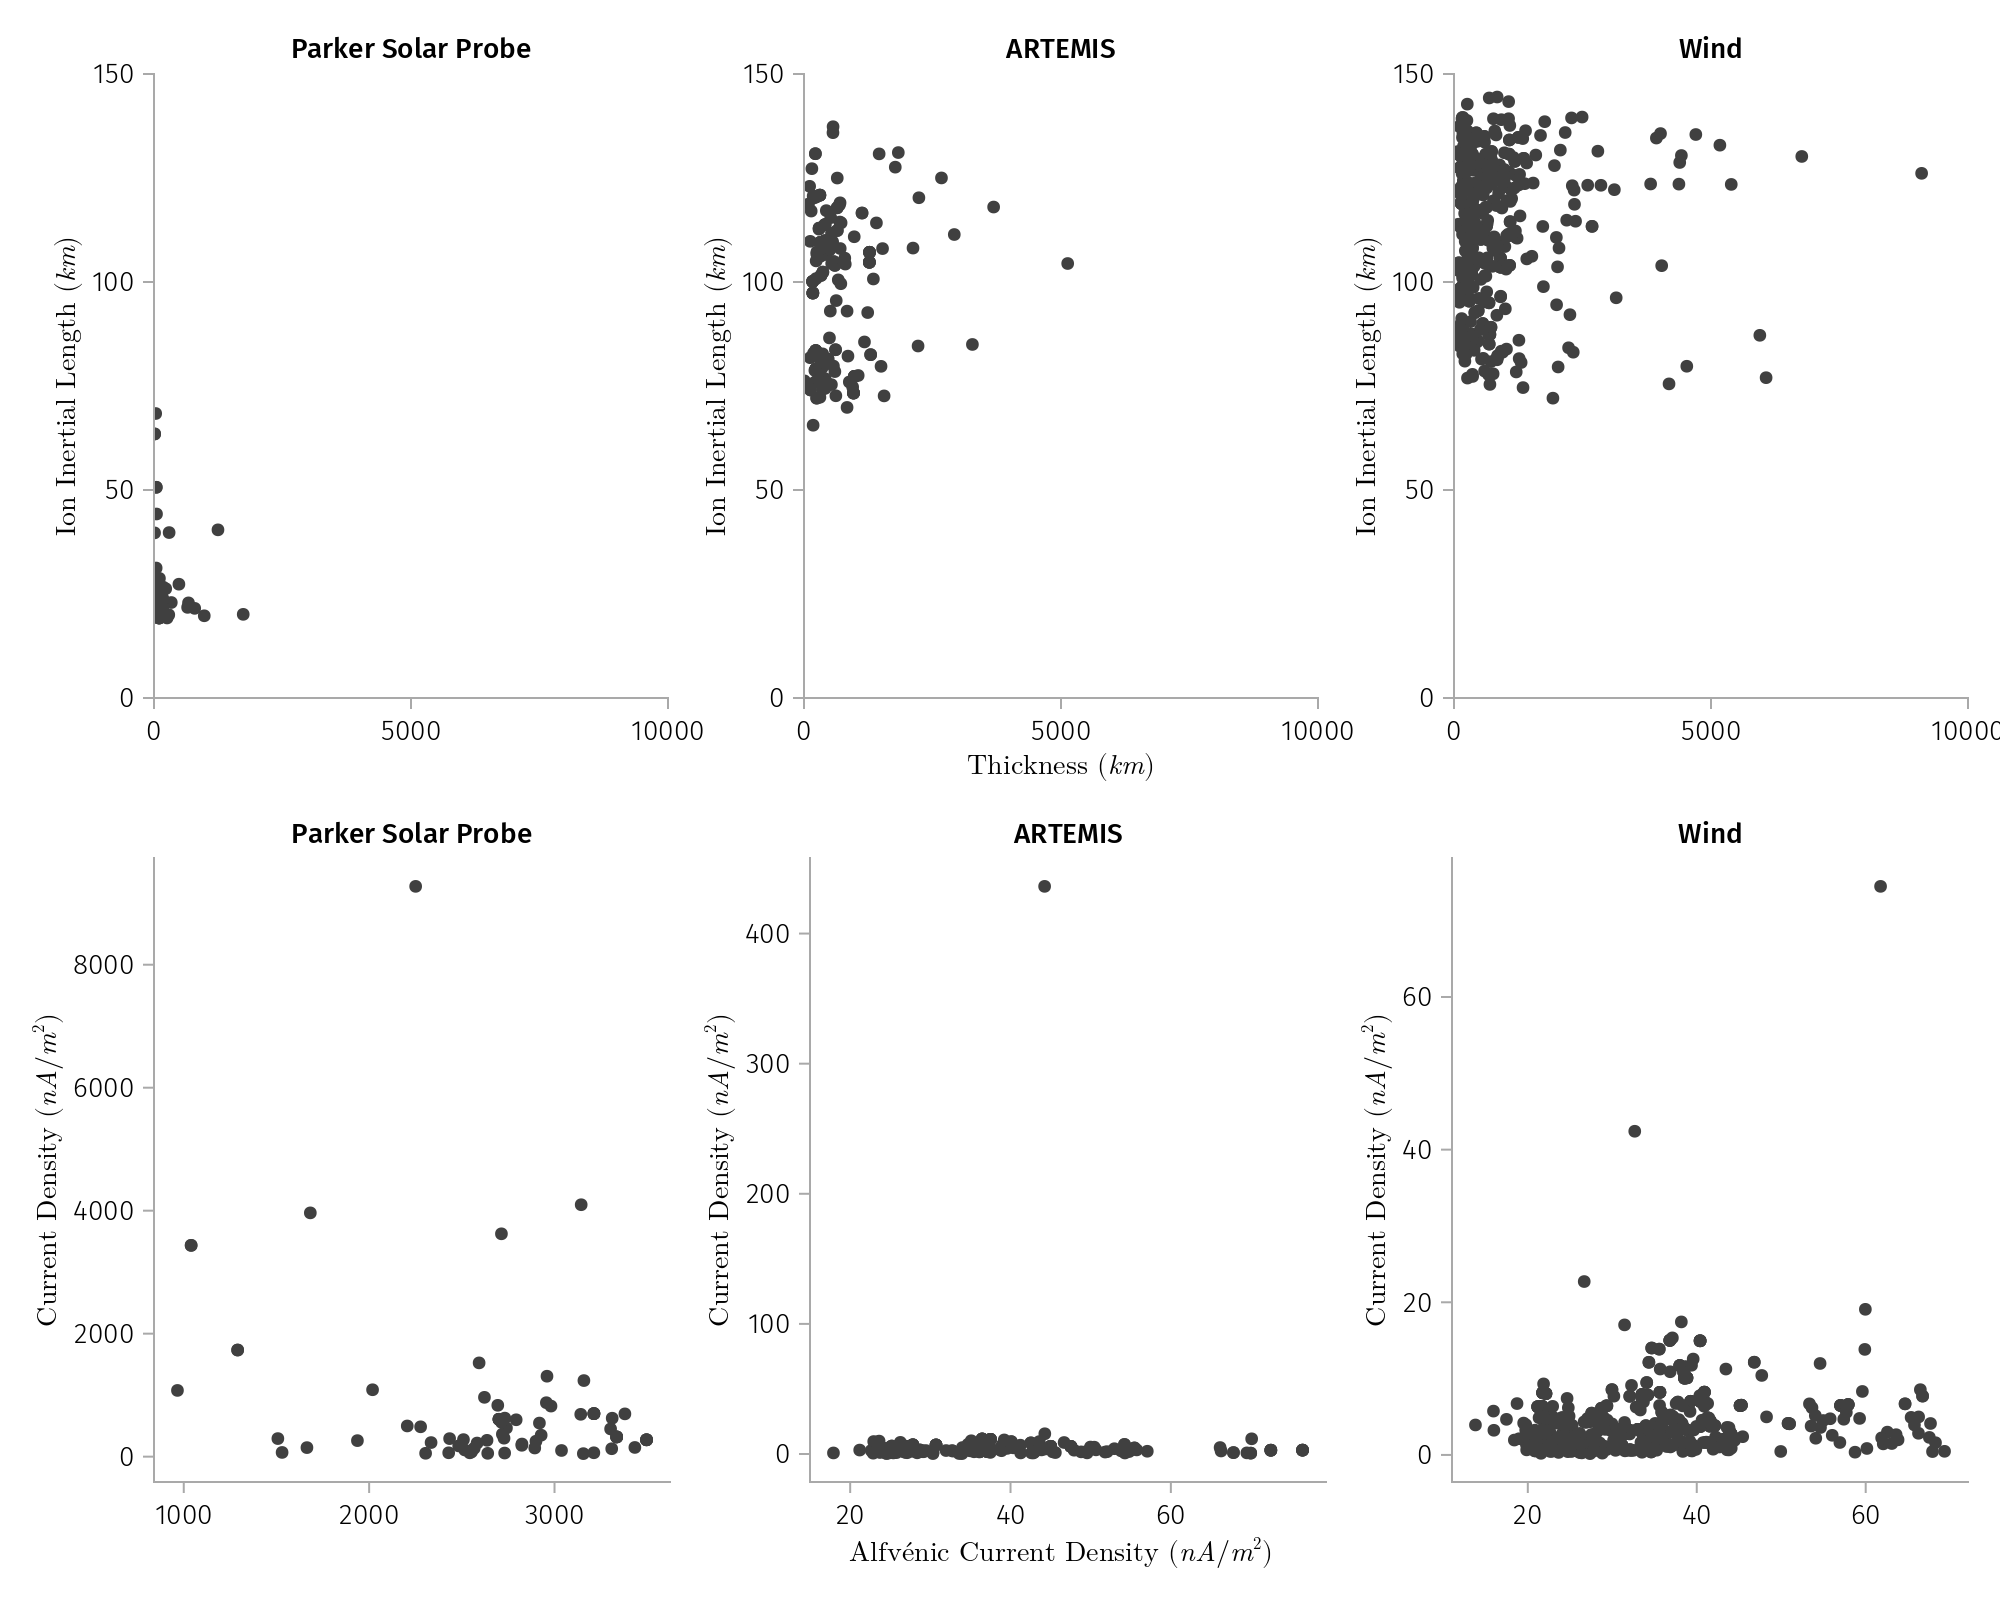

In [48]:
function plot_l_j_local_comp(df)
    fig = Figure(size=(1000, 800))

    data_layer = data(df) * mapping(col=:dataset)
    
    facet = (; linkxaxes = :none, linkyaxes = :none)
    # Thickness Panels
    begin
        plt = data_layer * mapping(l_map, di_map)
        # plt *= histogram(normalization=:pdf)
    
        limits = ((0, 10000), (0, 150))
        axis = (;limits=limits)

        draw!(fig[1,1:3], plt, axis=axis, facet=facet) 
    end

    # Current Density Panels
    begin
        plt = data_layer * mapping(jA_map, j_map)
        # plt *= histogram(normalization=:pdf)
        # axis = (;limits=j_log_limit)
        axis = (;)
        draw!(fig[2,1:3], plt, axis=axis, facet=facet) 
    end

    fig
end

df |> keep_good_fit |> plot_l_j_local_comp

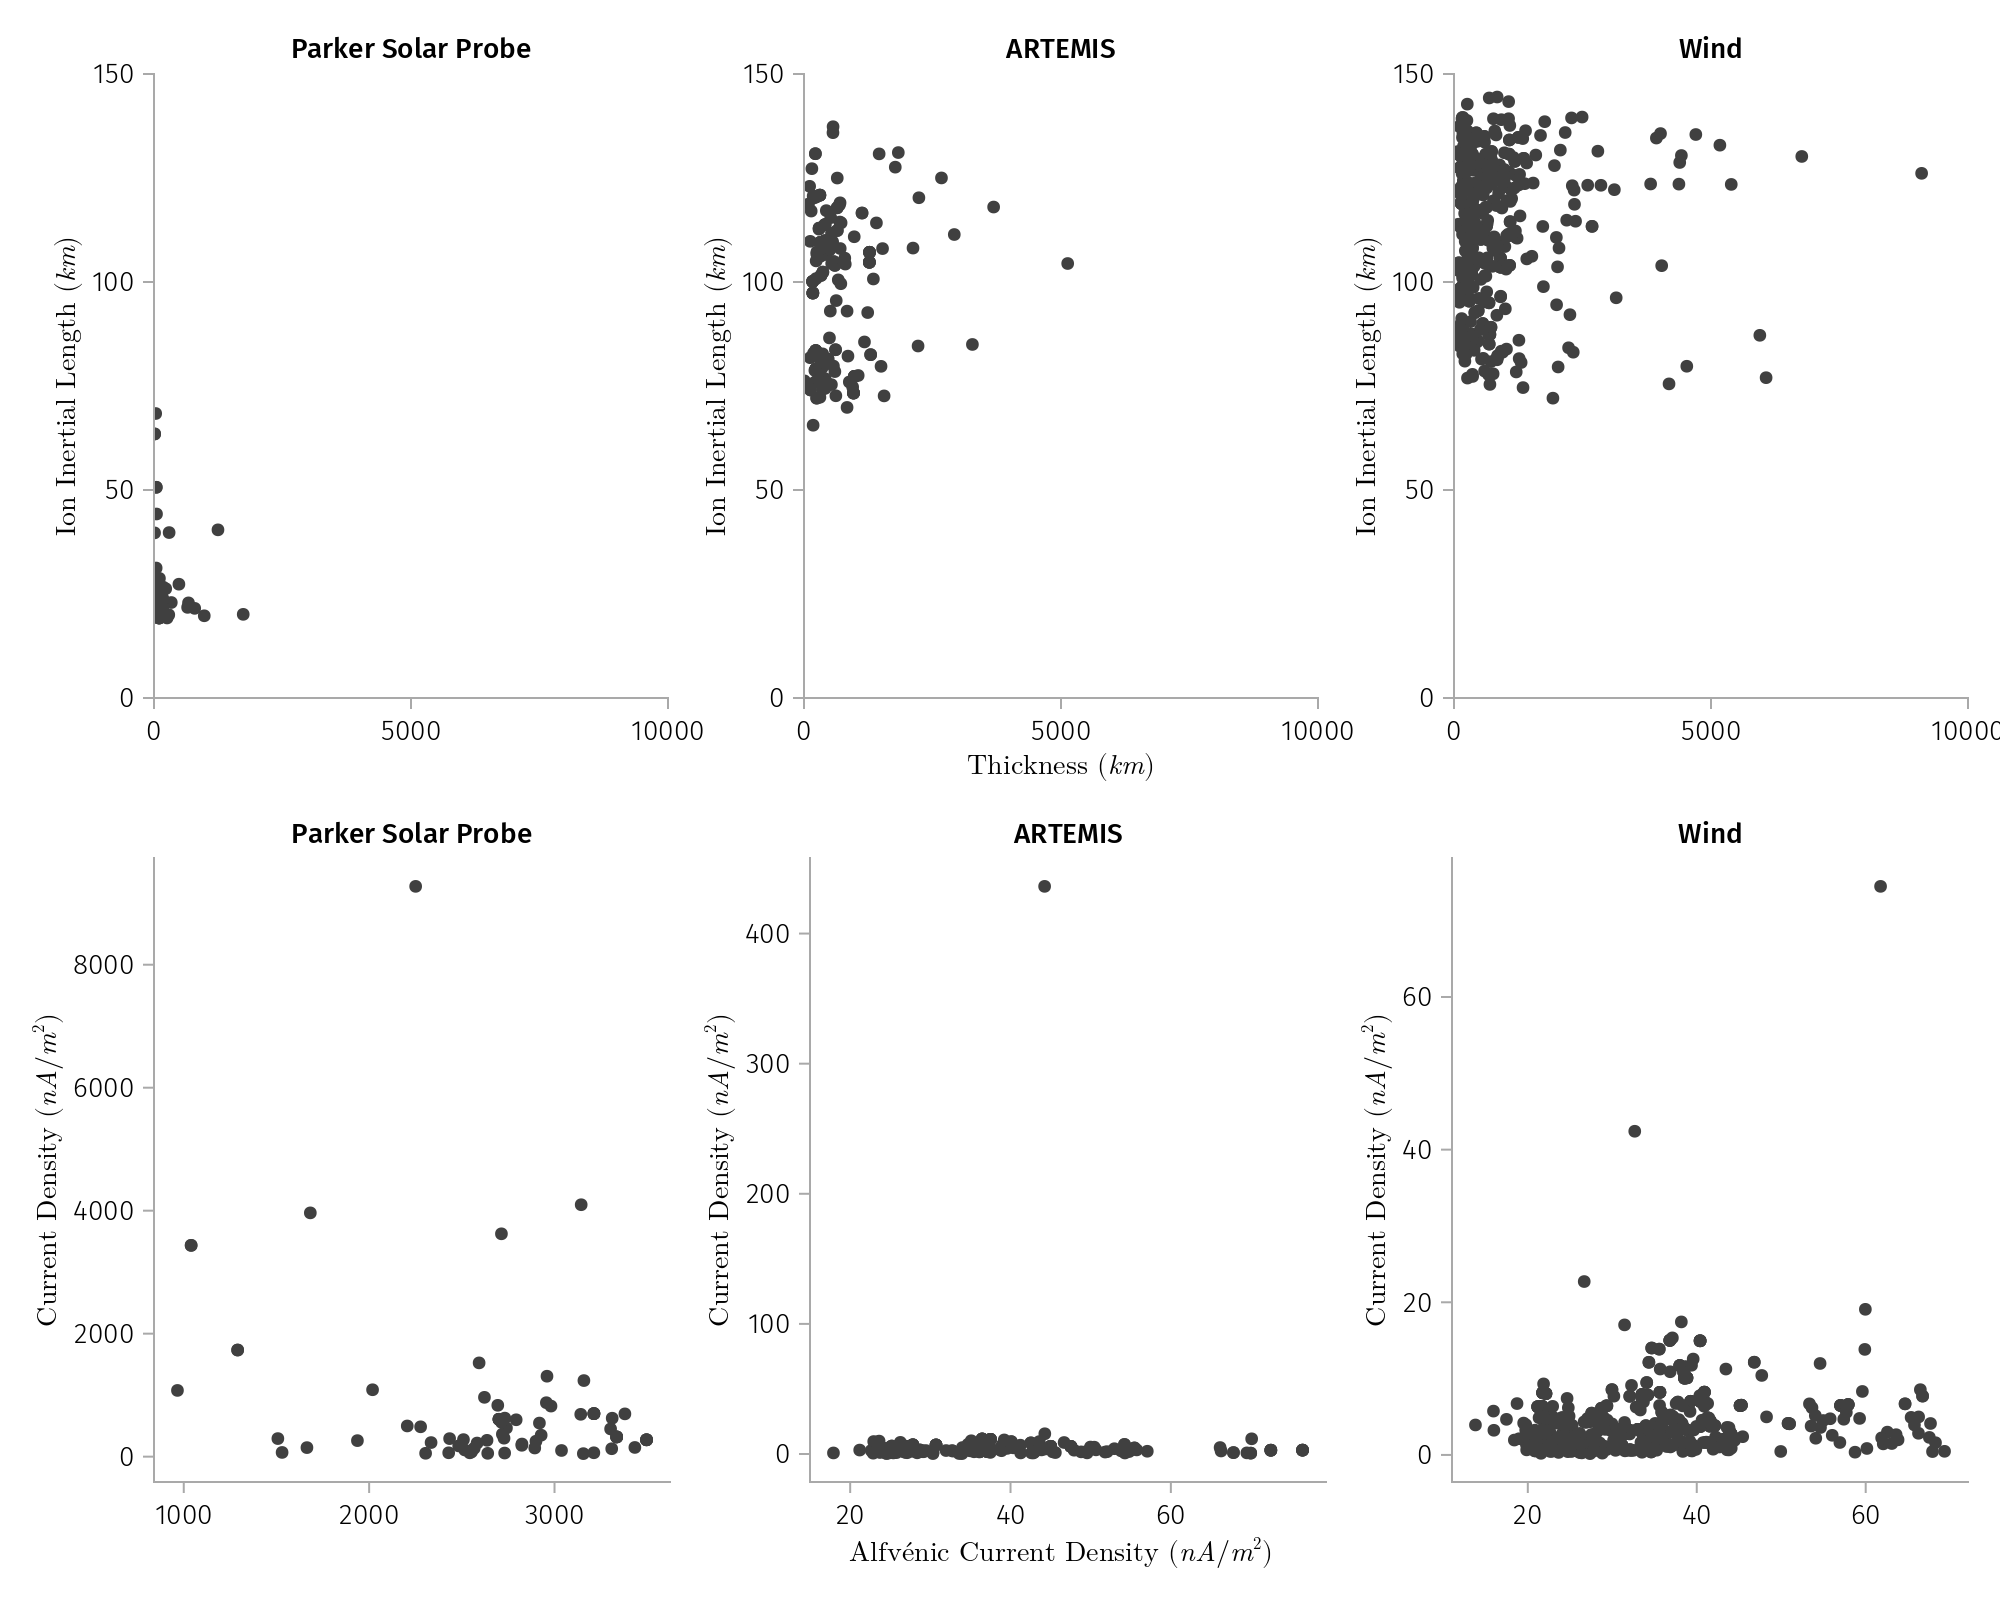

In [35]:
function plot_l_j_local_comp(df)
    fig = Figure(size=(1000, 800))

    data_layer = data(df) * mapping(col=:dataset)
    
    facet = (; linkxaxes = :none, linkyaxes = :none)
    # Thickness Panels
    begin
        plt = data_layer * mapping(l_map, di_map)
        # plt *= histogram(normalization=:pdf)
    
        limits = ((0, 10000), (0, 150))
        axis = (;limits=limits)

        draw!(fig[1,1:3], plt, axis=axis, facet=facet) 
    end

    # Current Density Panels
    begin
        plt = data_layer * mapping(jA_map, j_map)
        # plt *= histogram(normalization=:pdf)
        # axis = (;limits=j_log_limit)
        axis = (;)
        draw!(fig[2,1:3], plt, axis=axis, facet=facet) 
    end

    fig
end

df |> keep_good_fit |> plot_l_j_local_comp

┌ Info: Saved ../figures/enc2/thickness_current.spi_n_spi
└ @ Main /Users/zijin/projects/psp_conjunction/notebooks/utils.jl:11


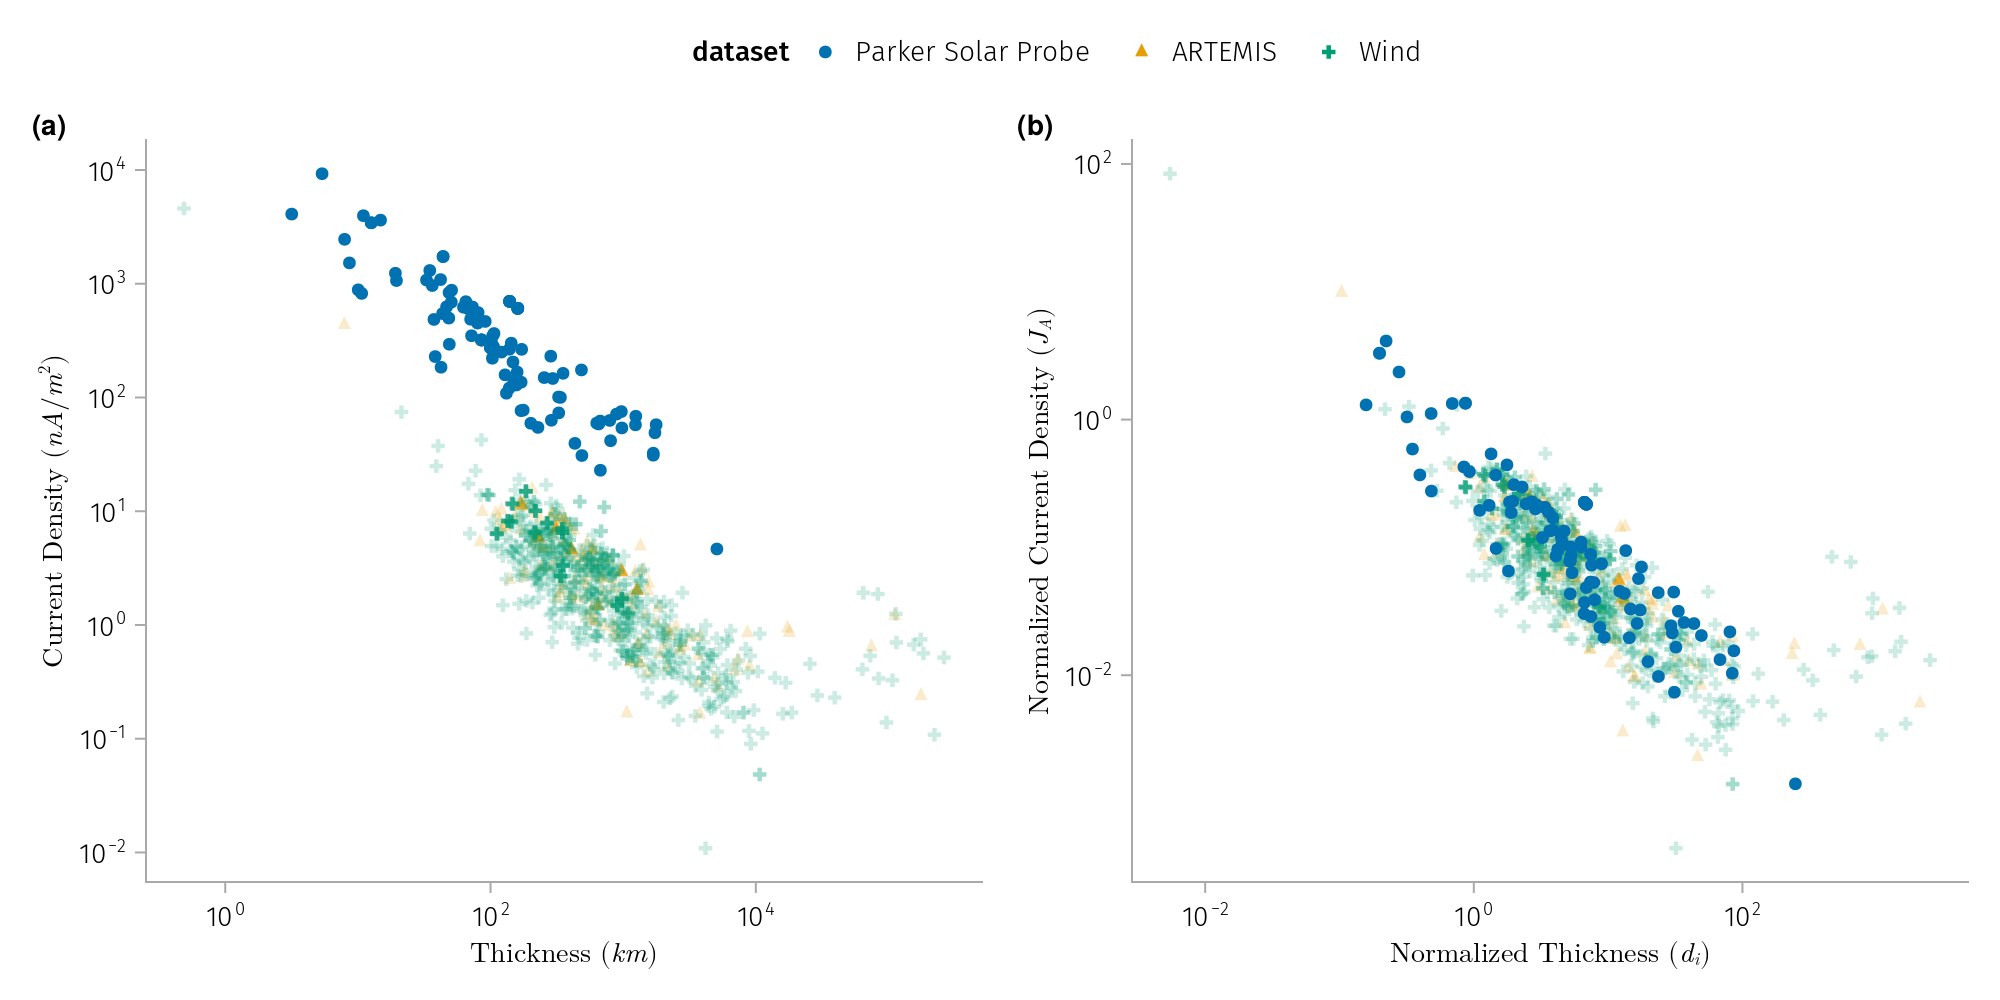

In [9]:
begin
    fname = "thickness_current"

    plt = data_layer_a * visual(Scatter)

    fig = Figure(size=(1000, 500))
    axis = log_axis

    ga = fig[1, 1]
    gb = fig[1, 2]

    grid1 = plt * mapping(l_map, j_map) |> draw!(ga; axis=axis)
    grid2 = plt * mapping(l_norm_map, current_norm_map) |> draw!(gb; axis=axis)

    pretty_legend!(fig, grid1)
    add_labels!([ga, gb])
    easy_save("$fname$psp_p_instr", fig)
    fig
end

┌ Info: Saved ../figures/enc2/density_distribution.spi_n_spi
└ @ Main /Users/zijin/projects/psp_conjunction/notebooks/utils.jl:11


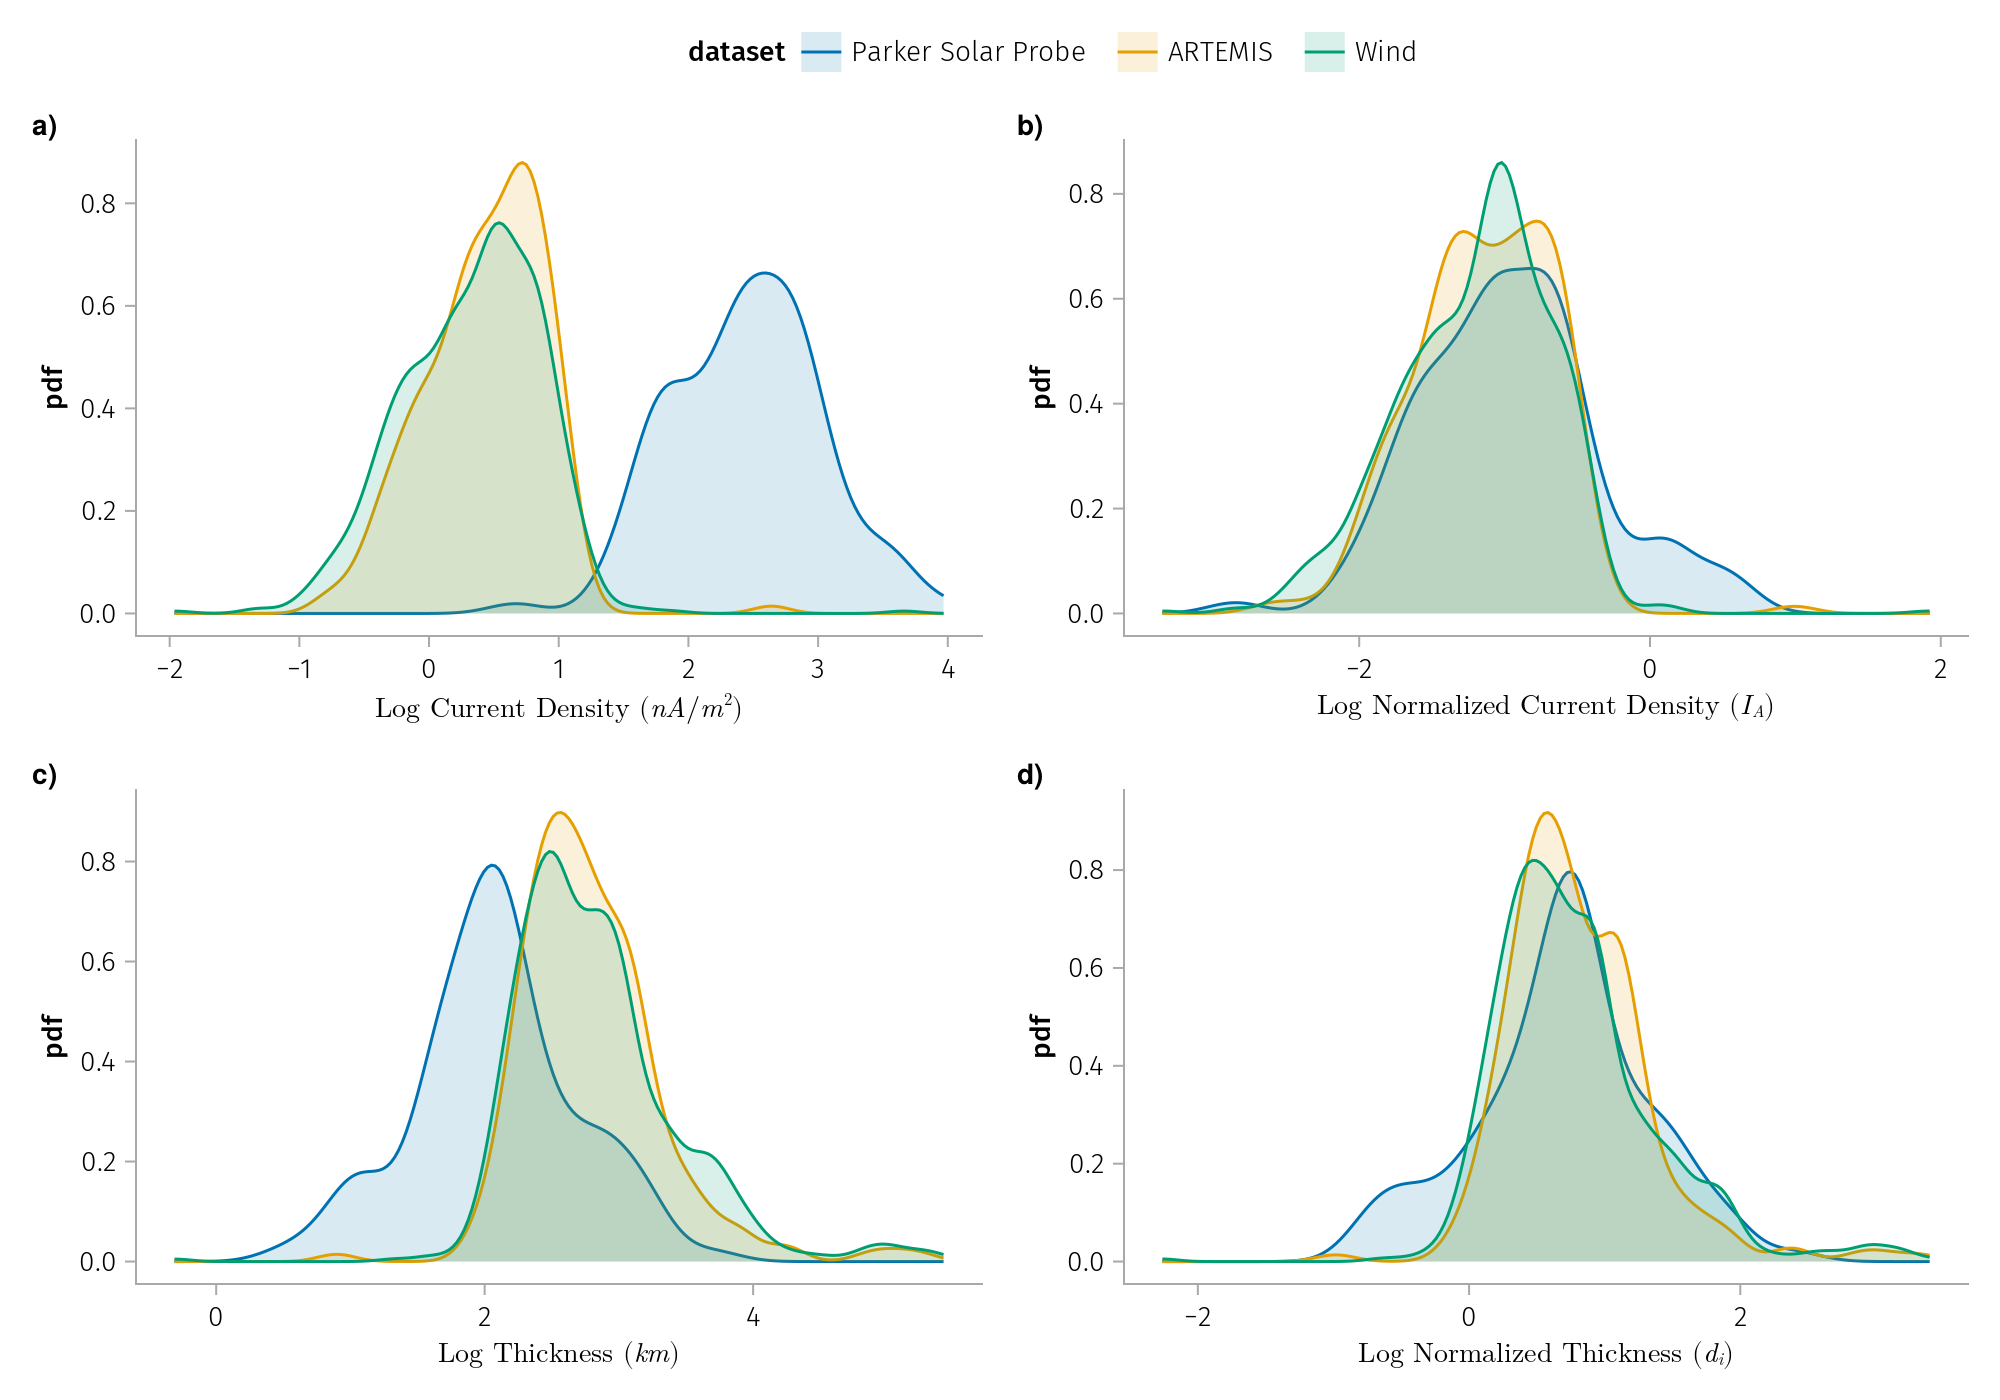

In [102]:
# plot the density distribution of the thickness and current density
function plot_dist()
    fname = "density_distribution"

    # data_layer = data_layer_a
    plt = data_layer * density()

    fig = Figure(size=(1000, 700))

    mapping_layer_j = mapping(:j0_k => log10 => L"Log %$(j_label)")
    mapping_layer_j_norm = mapping(:j0_k_norm => log10 => L"Log %$(j_norm_label)")
    mapping_layer_l = mapping(:L_k => log10 => L"Log %$(l_label)")
    mapping_layer_l_norm = mapping(:L_k_norm => log10 => L"Log %$(l_norm_label)")

    axis = (xscale = identity,)
    
    ga = fig[1, 1]
    gb = fig[1, 2]
    gc = fig[2, 1]
    gd = fig[2, 2]

    grid = draw!(ga, plt * mapping_layer_j; axis=axis)
    plt * mapping_layer_j_norm |> draw!(gb; axis=axis)
    plt * mapping_layer_l |> draw!(gc; axis=axis)
    plt * mapping_layer_l_norm |> draw!(gd; axis=axis)

    pretty_legend!(fig, grid)
    add_labels!([ga, gb, gc, gd]; labels=["a)", "b)", "c)", "d)"])
    easy_save("$fname$psp_p_instr", fig)

    fig
end

plot_dist()

`ggscatterhist` can not handle log scale well

In [109]:
dn_over_n = ("n.change", "n.mean") => (/) => L"\Delta n/n"
dB_over_B = ("B.change", "b_mag") => (/) => L"\Delta B/B"
dT_over_T = ("T.change", "T.mean") => (/) => L"\Delta T/T"

("T.change", "T.mean") => ((/) => L"$\Delta T/T$")

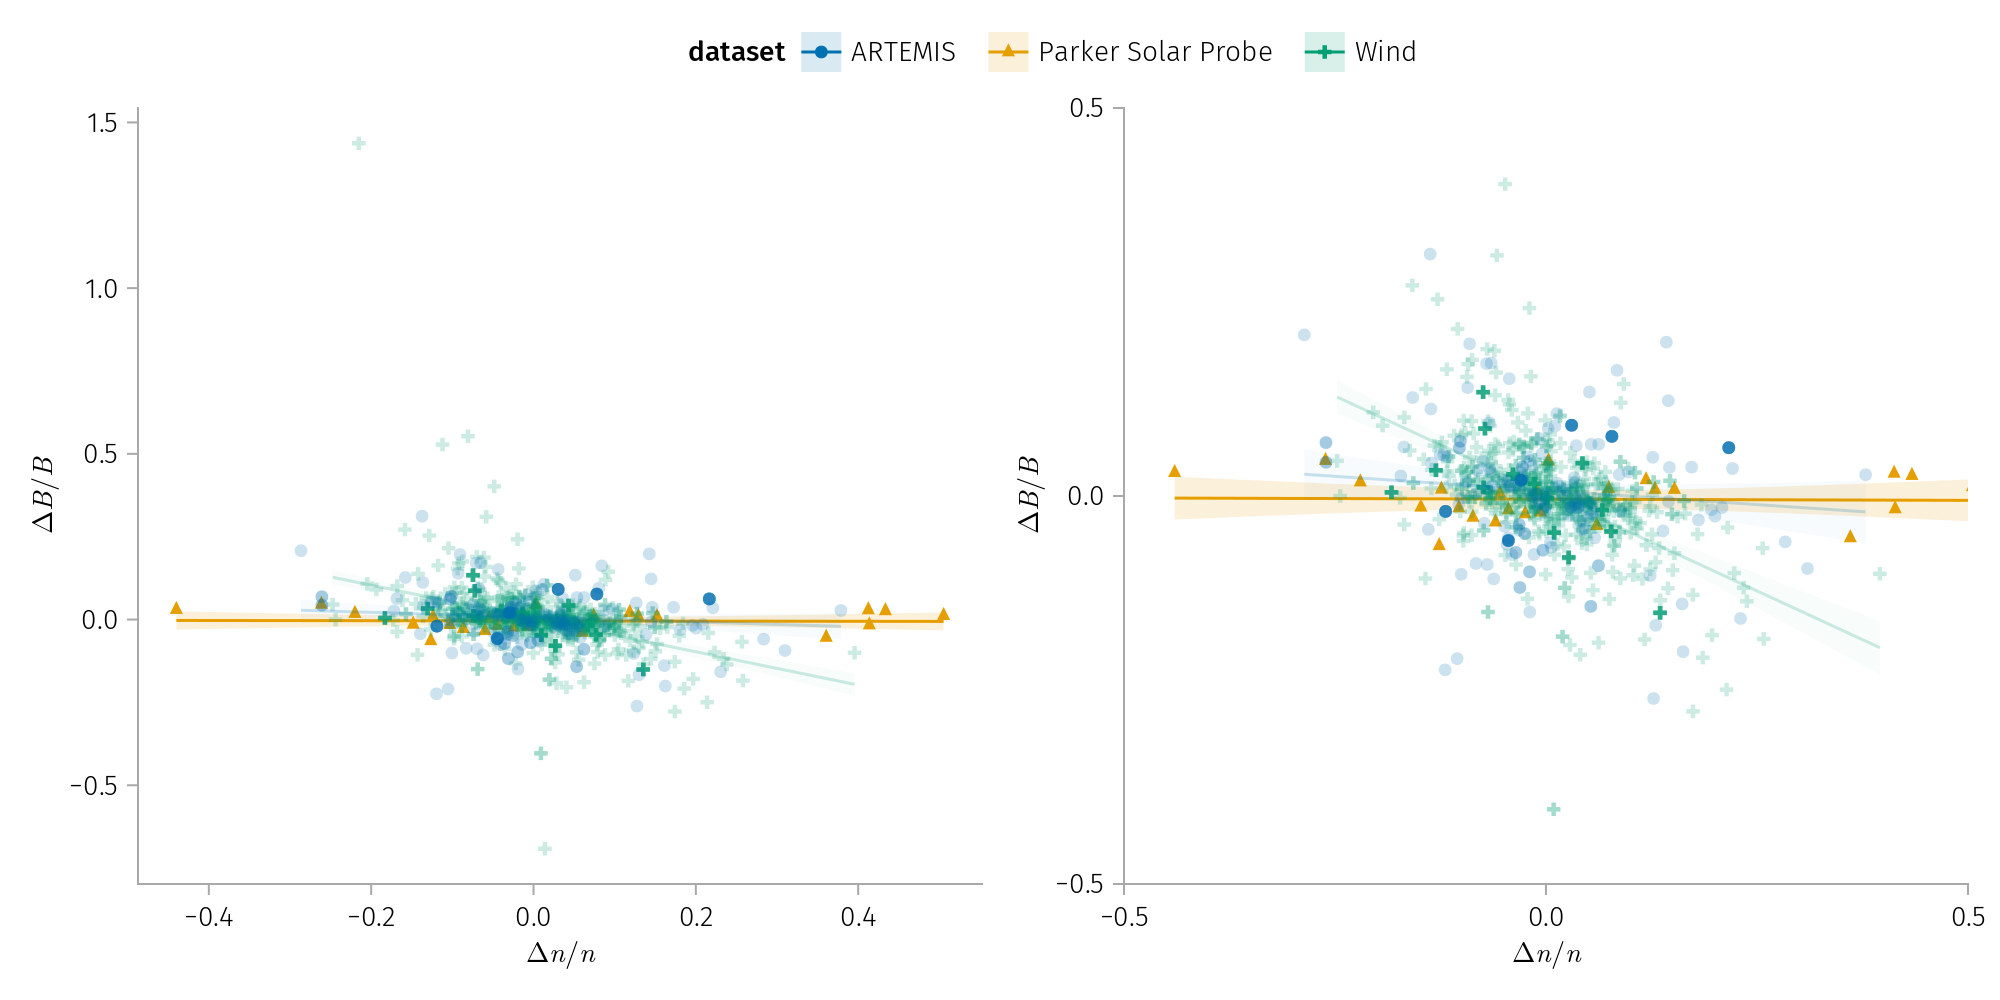

In [110]:
#| label: fig-dn-dB
#| column: screen
begin
    fname = "dn-dB"
    plt = data_layer_a * mapping(dn_over_n, dB_over_B) * (linear() + mapping())

    fig = Figure(size=(1000, 500))
    grid1 = plt |> draw!(fig[2, 1])
    grid2 = plt |> draw!(fig[2, 2], axis=(; limits=((-0.5, 0.5), (-0.5, 0.5))))

    pretty_legend!(fig, grid1)
    easy_save("$(fname)_$psp_p_instr")

    fig
end

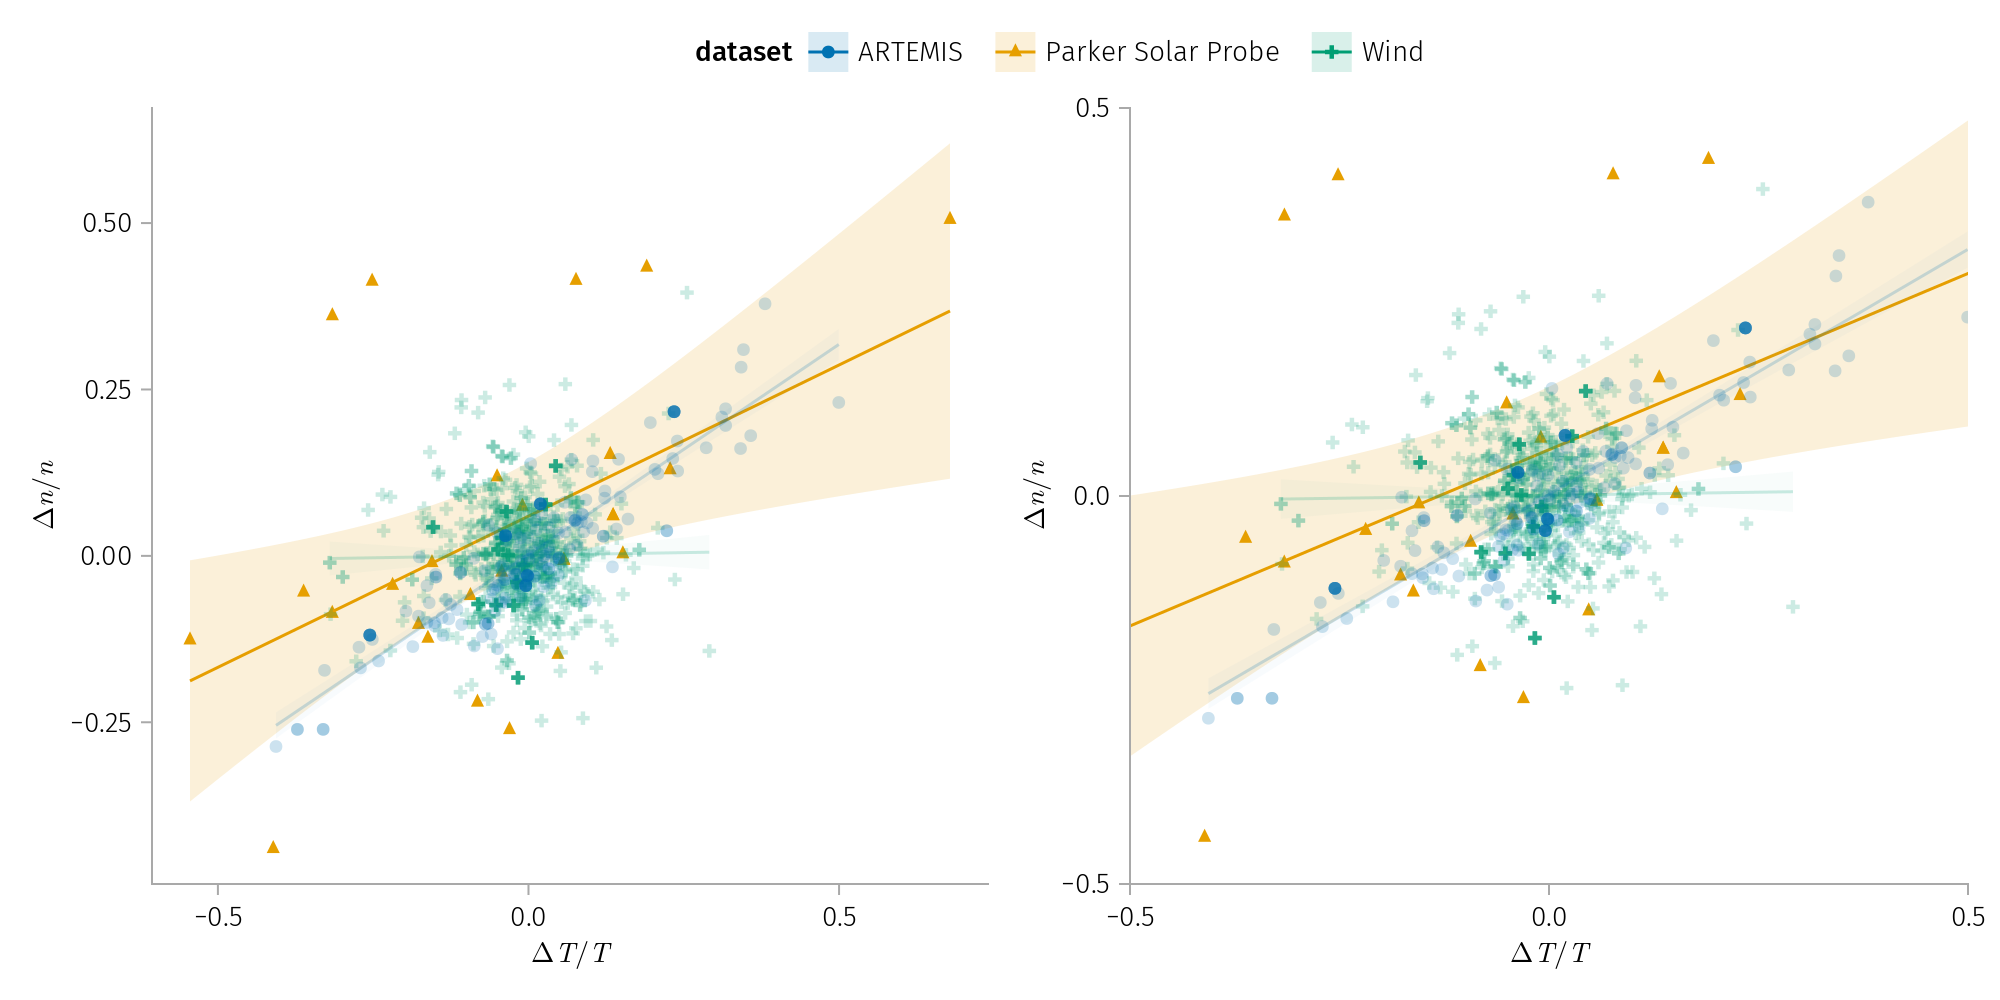

In [111]:
#| label: fig-dn-dT
#| column: screen
begin
    fname = "dn-dT"
    plt = data_layer_a * mapping(dT_over_T, dn_over_n) * (linear() + mapping())

    fig = Figure(size=(1000, 500))
    grid1 = plt |> draw!(fig[2, 1])
    grid2 = plt |> draw!(fig[2, 2]; axis=(; limits=((-0.5, 0.5), (-0.5, 0.5))))

    pretty_legend!(fig, grid1)
    easy_save("$(fname)_$psp_p_instr")

    fig
end

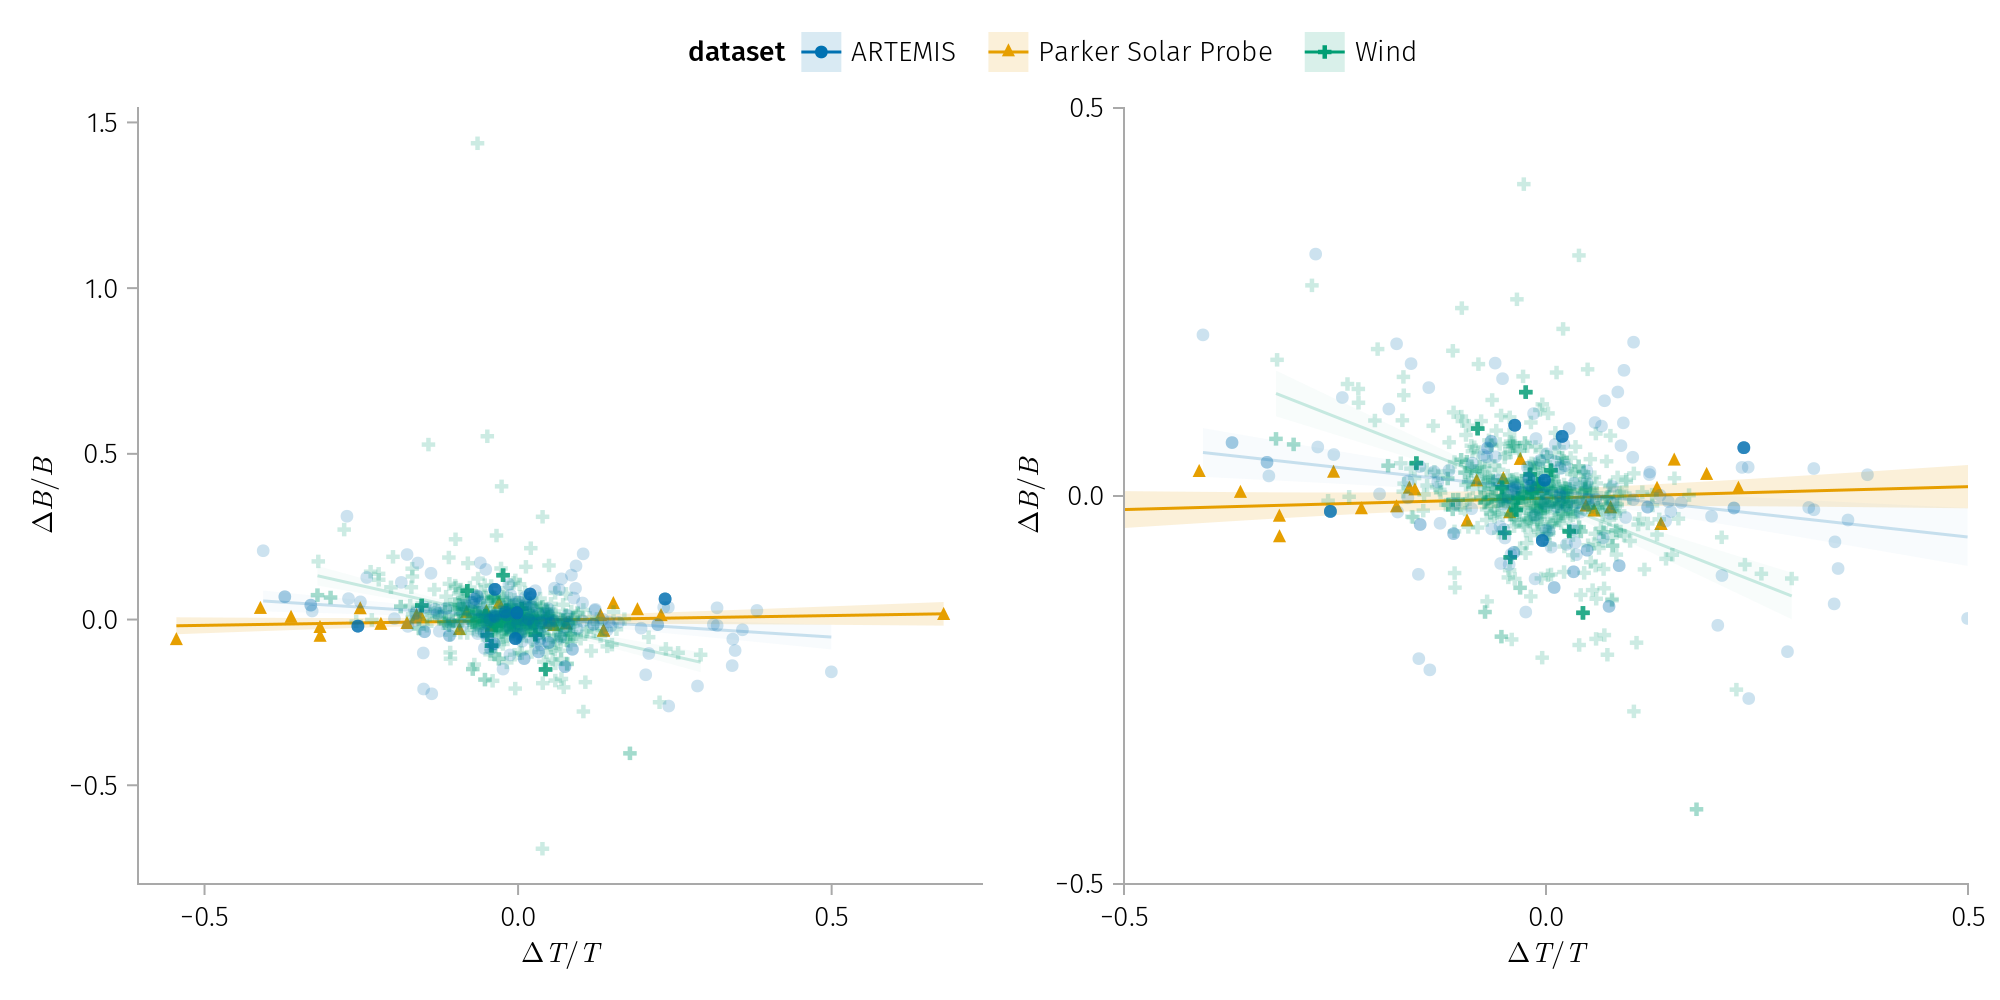

In [112]:
#| label: fig-dT-dB
#| column: screen
begin
    fname = "dT-dB"
    plt = data_layer_a * mapping(dT_over_T, dB_over_B) * (linear() + mapping())

    fig = Figure(size=(1000, 500))
    grid = draw!(fig[2, 1], plt)
    draw!(fig[2, 2], plt, axis=(; limits=((-0.5, 0.5), (-0.5, 0.5))))
    legend!(fig[1, 1:2], grid, titleposition=:left, orientation=:horizontal)

    easy_save("$(fname)_$psp_p_instr")

    fig
end

## Comparison of change in Alfven speed and plasma speed

The distinguishing feature of rotational discontinuities is the plasma velocity jump across them: the plasma ﬂow velocity $v_l$ (the solar wind velocity projected onto l) changes due to changes in $B_l$, $Δv_l=±Δv_A$ with $v_A= B_l / \sqrt{4 n m}$ (Landau & Lifshitz 1960; Hudson 1970).

In [135]:
v_Alfven_map = "v.Alfven.change.l" => L"\Delta V_{A,l}"
v_ion_map = "v.ion.change.l" => L"\Delta V_{i,l}"

function plot_dvl()
    fname = "dvl"

    # plt = data_layer_a * mapping(v_Alfven_map, v_ion_map) * (linear(interval=nothing) + mapping())
    plt = data_layer_a * mapping(v_Alfven_map, v_ion_map)

    fig = Figure(size=(1000, 500))

    limit_axis = (; limits=((2, 400), (2, 400)))
    axis = merge(log_axis, limit_axis)

    grid1 = plt |> draw!(fig[1, 1])

    slopes = [1.0, 0.7, 0.4, 0.1]
    for s in slopes
        ablines!(0, s, linestyle=:dash)
    end

    grid2 = plt |> draw!(fig[1, 2]; axis=axis)
    # ax2 = Axis(fig[1, 2]; axis...)
    # grid2 = draw!(ax2, plt)
    
    for s in slopes
        lines!(1 .. 1000, (*) $ s, linestyle=:dash, label = "$s")
    end
    axislegend("slope", position = :ct)

    # add labels
    add_labels!([fig[1, 1], fig[1, 2]]; )
    pretty_legend!(fig, grid2)

    easy_save("$(fname)$psp_p_instr", fig)

    fig
end

plot_dvl (generic function with 1 method)

┌ Info: Saved ../figures/enc2/dvl.spi_n_spi
└ @ Main /Users/zijin/projects/psp_conjunction/notebooks/utils.jl:11


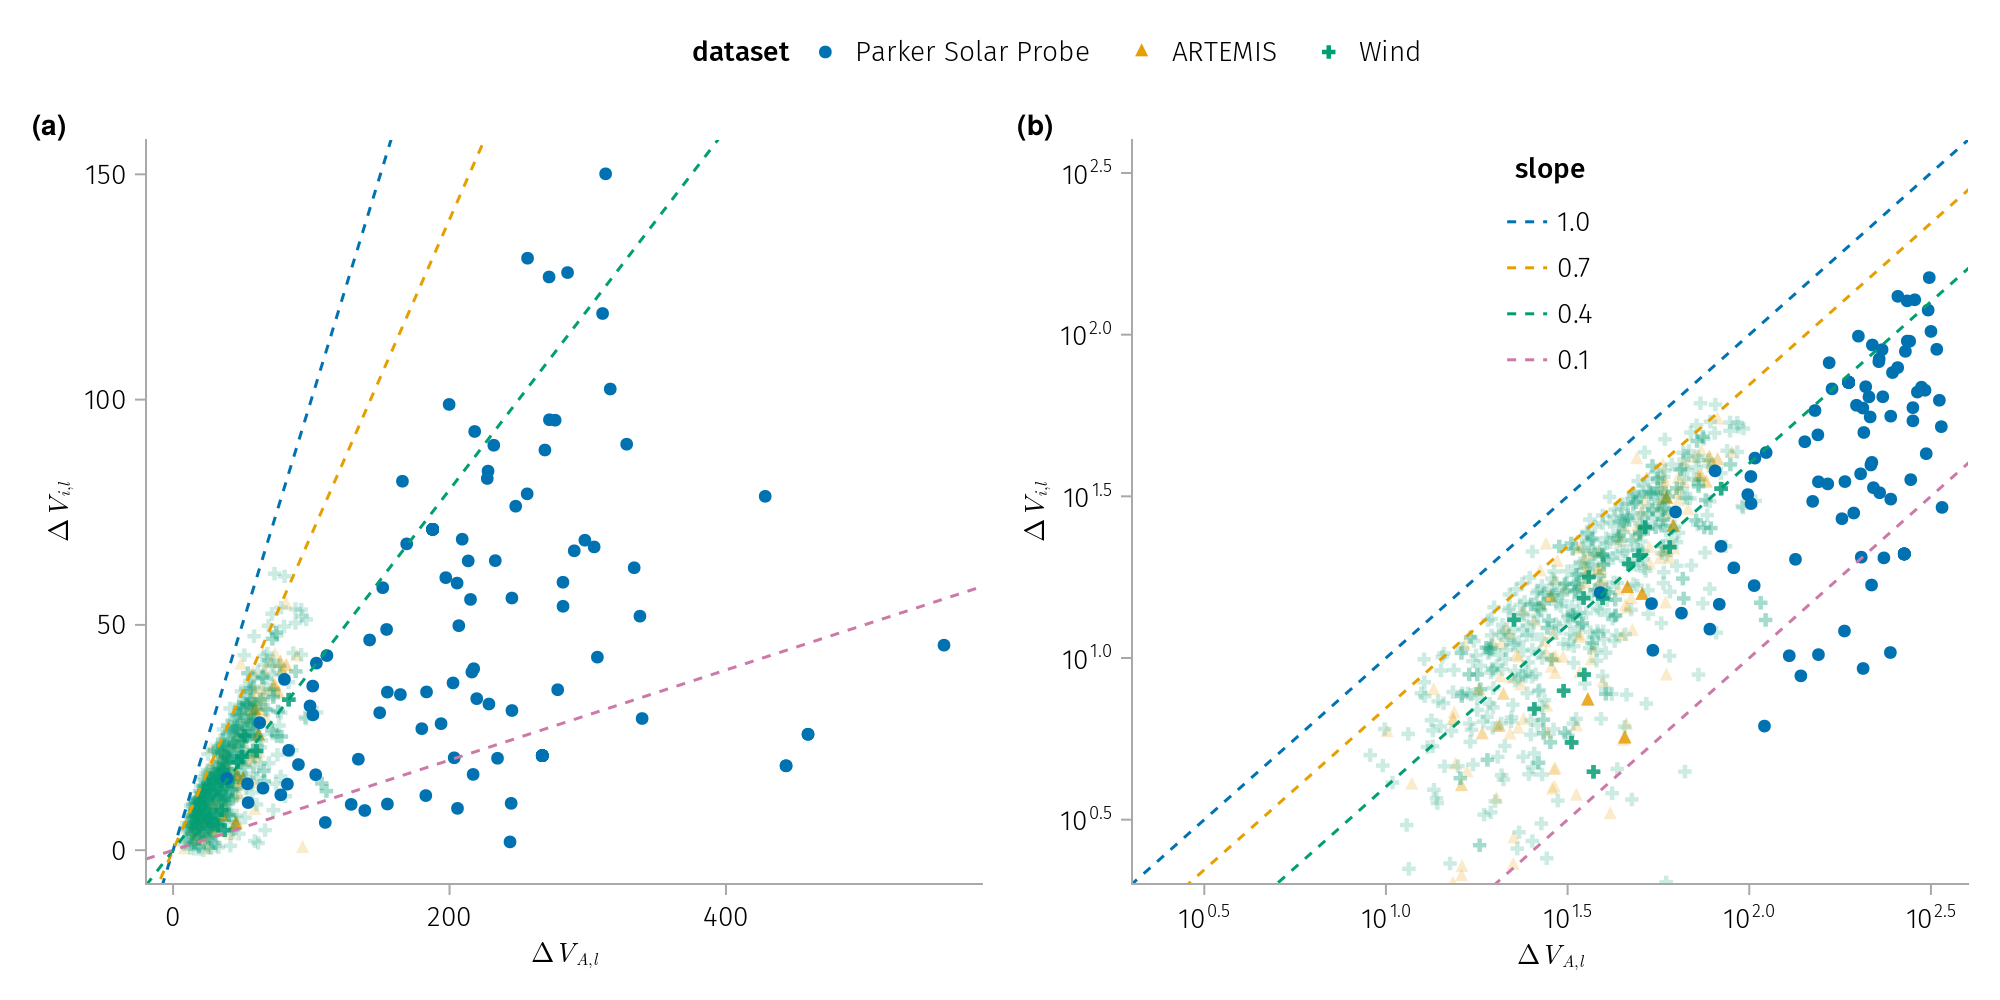

In [136]:
#| label: fig-dvl
#| column: screen
fig = plot_dvl()

In [91]:
fieldnames(fig.scene.axes)

ErrorException: type Scene has no field axes

## Anistropy

@shenComparingPlasmaAnisotropy2024

In [61]:
Λ_t_map = :Λ_t => L"\Lambda_{theory}"
Λ_ion_map = :Λ_ion => L"\Lambda_i"
Λ_e_map = :Λ_e => L"\Lambda_e"
Λ_map = :Λ => L"\Lambda"

Λs = ["Λ_t", "Λ_ion", "Λ_e", "Λ"]

4-element Vector{String}:
 "Λ_t"
 "Λ_ion"
 "Λ_e"
 "Λ"

In [89]:
function plot_anistropy()
    fname = "anisotropy"

    plt = data_layer_a * mapping(Λ_t_map)

    fig = Figure(size=(1000, 500))
    grid1 = plt * density() |> draw!$fig[1, 1]
    grid2 = plt * histogram() |> draw!$fig[1, 2]

    add_labels!([fig[1, 1], fig[1, 2]])
    pretty_legend!(fig, grid1)
    easy_save("$(fname)$psp_p_instr", fig)
    
    fig
end

function plot_anistropy(df)
    fname = "anisotropy"

    variables = intersect(names(df), Λs)

    plt = data(stack(df, variables, [:time, :dataset]))

    plt *= mapping(:value, row=:variable => latexstring, color=ds_mapping)

    fig = Figure(size=(1000, 500))
    facet = (; linkxaxes=:minimal, linkyaxes=:minimal)

    grid1 = draw!(fig[1, 1], plt * density(), facet=facet)
    grid2 = draw!(fig[1, 2], plt * histogram(), facet=facet)

    add_labels!([fig[1, 1], fig[1, 2]])
    pretty_legend!(fig, grid1)
    easy_save("$(fname)$psp_p_instr", fig)
    
    fig
end

plot_anistropy (generic function with 2 methods)

┌ Info: Saved ../figures/enc7/anisotropy.spi_n_spi
└ @ Main /Users/zijin/projects/psp_conjunction/notebooks/utils.jl:12


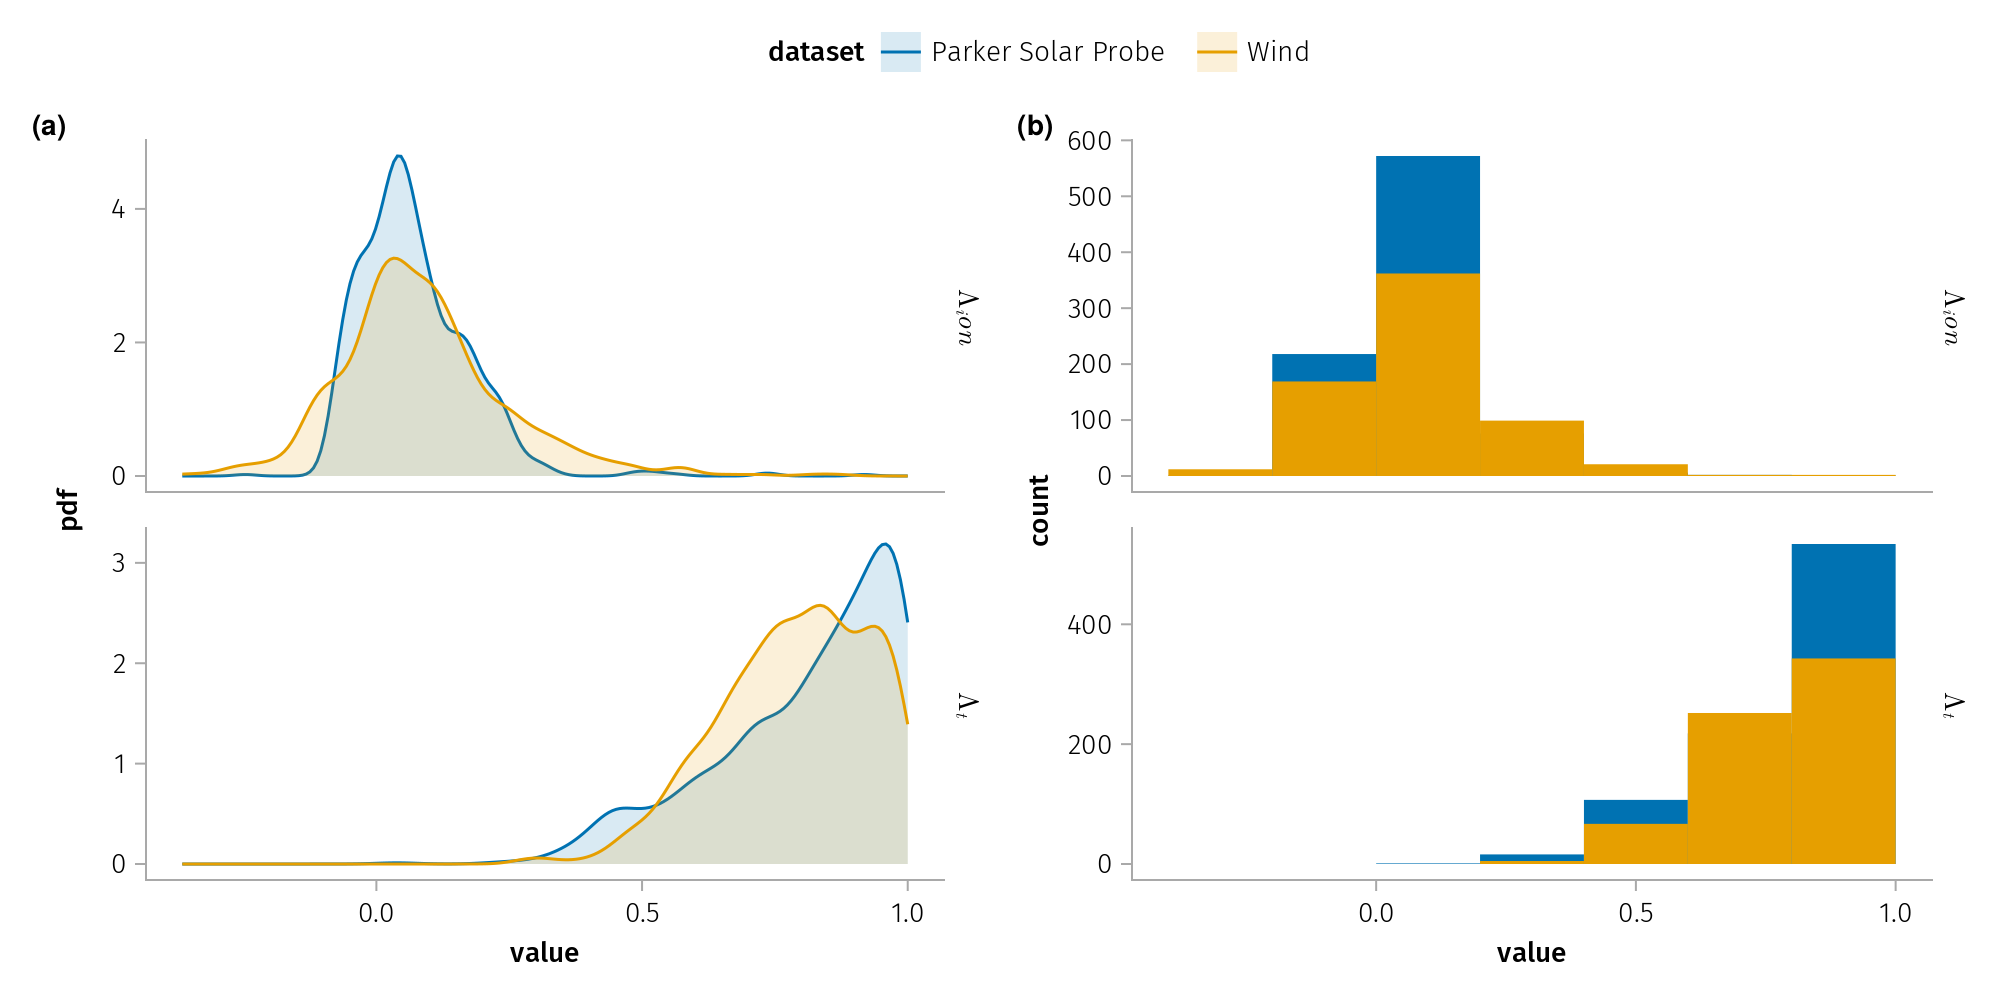

In [90]:
plot_anistropy(df)

┌ Info: Saved ../figures/enc7/anisotropy.spi_n_spi
└ @ Main /Users/zijin/projects/psp_conjunction/notebooks/utils.jl:12


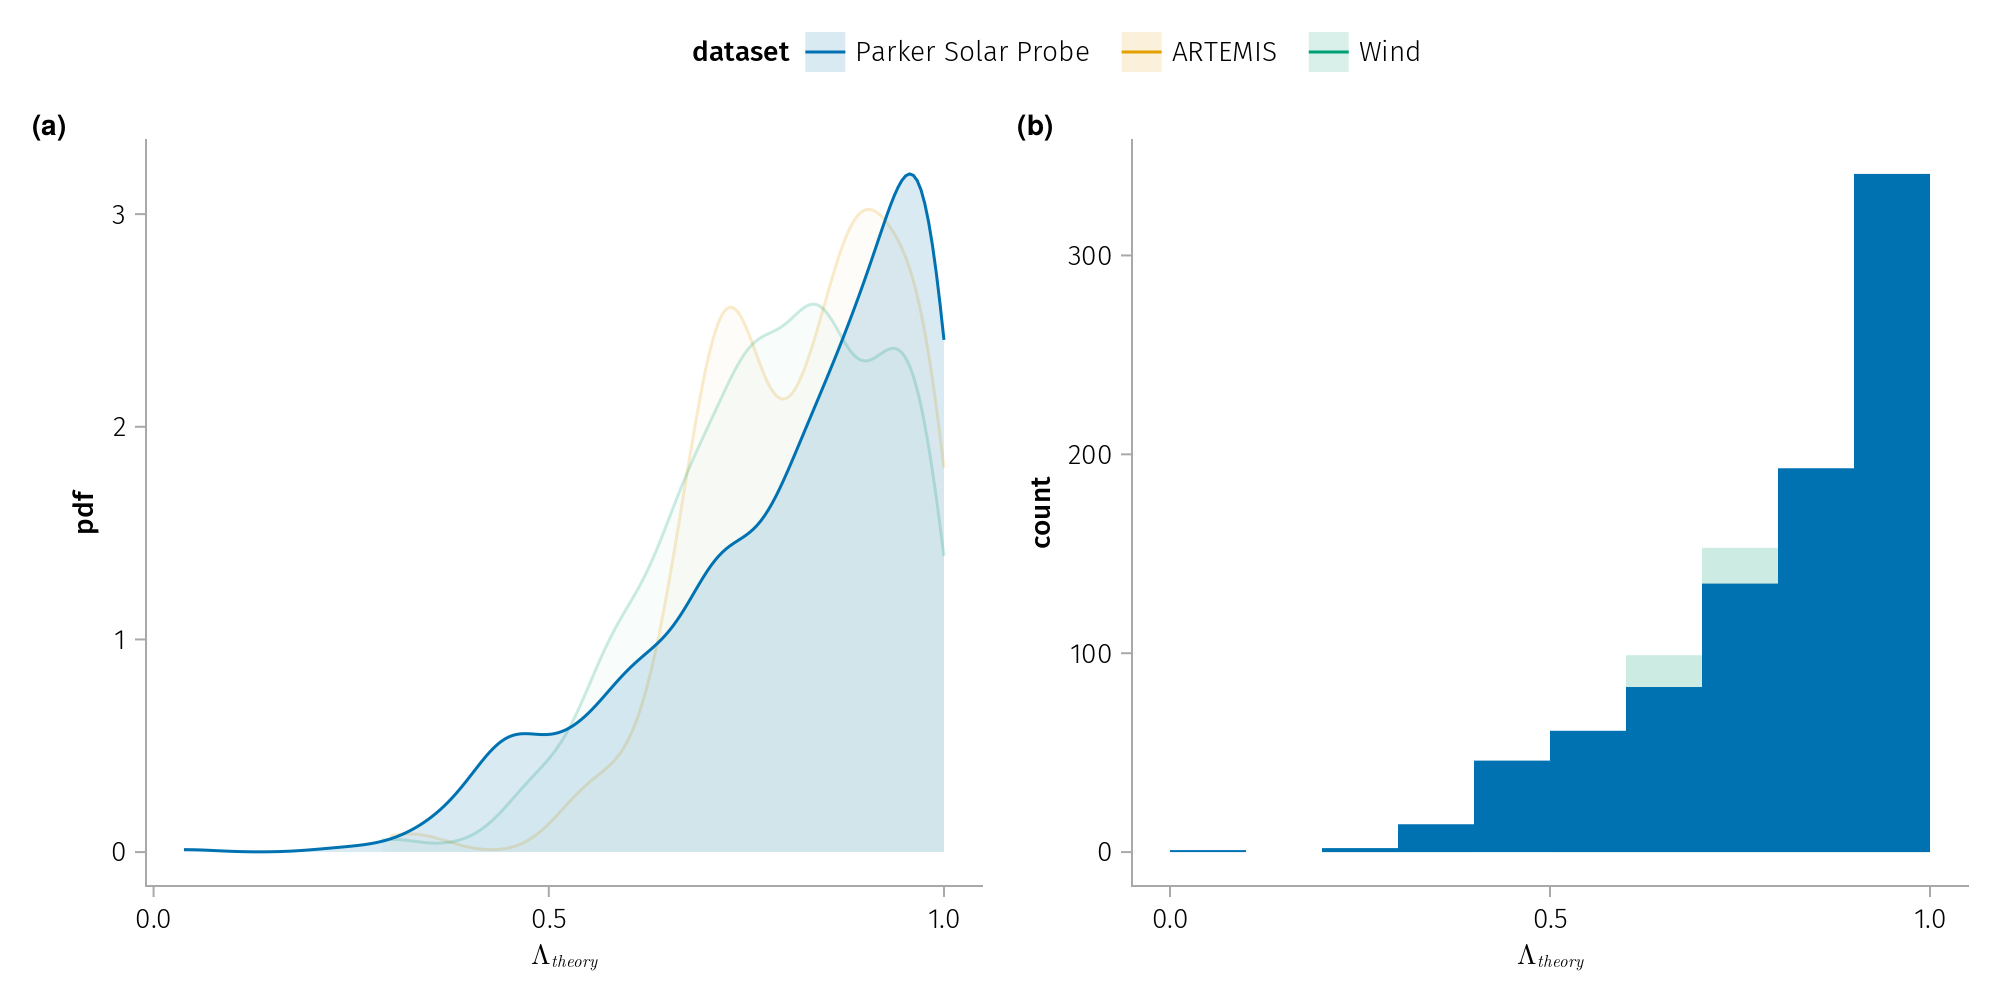

In [58]:
#| label: fig-anisotropy
#| column: screen
plot_anistropy()

In [35]:
function plot_anistropy_comparison()
    fname = "anisotropy_comparison"

    fig = Figure(size=(1000, 800))

    plt_Λ = data(
        stack(earth_df, [:Λ, :Λ_t, :Λ_ion, :Λ_e], [:time, :dataset])
    ) * mapping(:value => L"\Lambda", color=:variable, marker=:variable, col=:dataset)

    grid1 = plt_Λ * density() |> draw!$fig[1, 1:2]
    grid2 = plt_Λ * histogram() |> draw!$fig[2, 1:2]
    # easy_save("$(fname)_$psp_p_instr")
    # legend!(fig[1, 1:2], grid, titleposition=:left, orientation=:horizontal)
    pretty_legend!(fig, grid1)

    fig
end

function plot_anistropy_comparison_2d(df)
    fname = "anisotropy_comparison_2d"
    
    variables = intersect(names(df), ["Λ_ion", "Λ_e", "Λ"])

    temp_df = @chain begin
        stack(df, variables, [:time, :dataset, :Λ_t])
        @transform(:variable = :variable)
    end

    fig = Figure(size=(1000, 800))

    mapping_layer = mapping(Λ_t_map, :value => L"\Lambda")

    plt1 = data(
        temp_df
    ) * mapping(
        row=:variable => latexstring, col=:dataset,
        color=:dataset, marker=:dataset,
    )

    # draw a dashed line with slope 1
    df2 = (Λ_t=[0, 1], value=[0, 1])
    plt2 = data(df2) * visual(Lines)

    plt = (plt1 + plt2) * mapping_layer

    grid1 = draw!(fig[1:3, 1:2], plt, facet=(; linkxaxes=:minimal, linkyaxes=:none))

    fig
end

function plot_anistropy_comparison_i_e()
    fname = "anisotropy_comparison_i_e"

    mapping_layer = mapping(
        Λ_e_map, Λ_ion_map,
    )

    # draw a dashed line with slope 1
    df2 = (Λ_e=[0, 0.3], Λ_ion=[0, 0.3])

    plt = (data(earth_df) * mapping(row=:dataset) + data(df2) * visual(Lines)) * mapping_layer

    fig = draw(plt, facet=(; linkxaxes=:minimal, linkyaxes=:minimal))
    fig
end

plot_anistropy_comparison_i_e (generic function with 1 method)

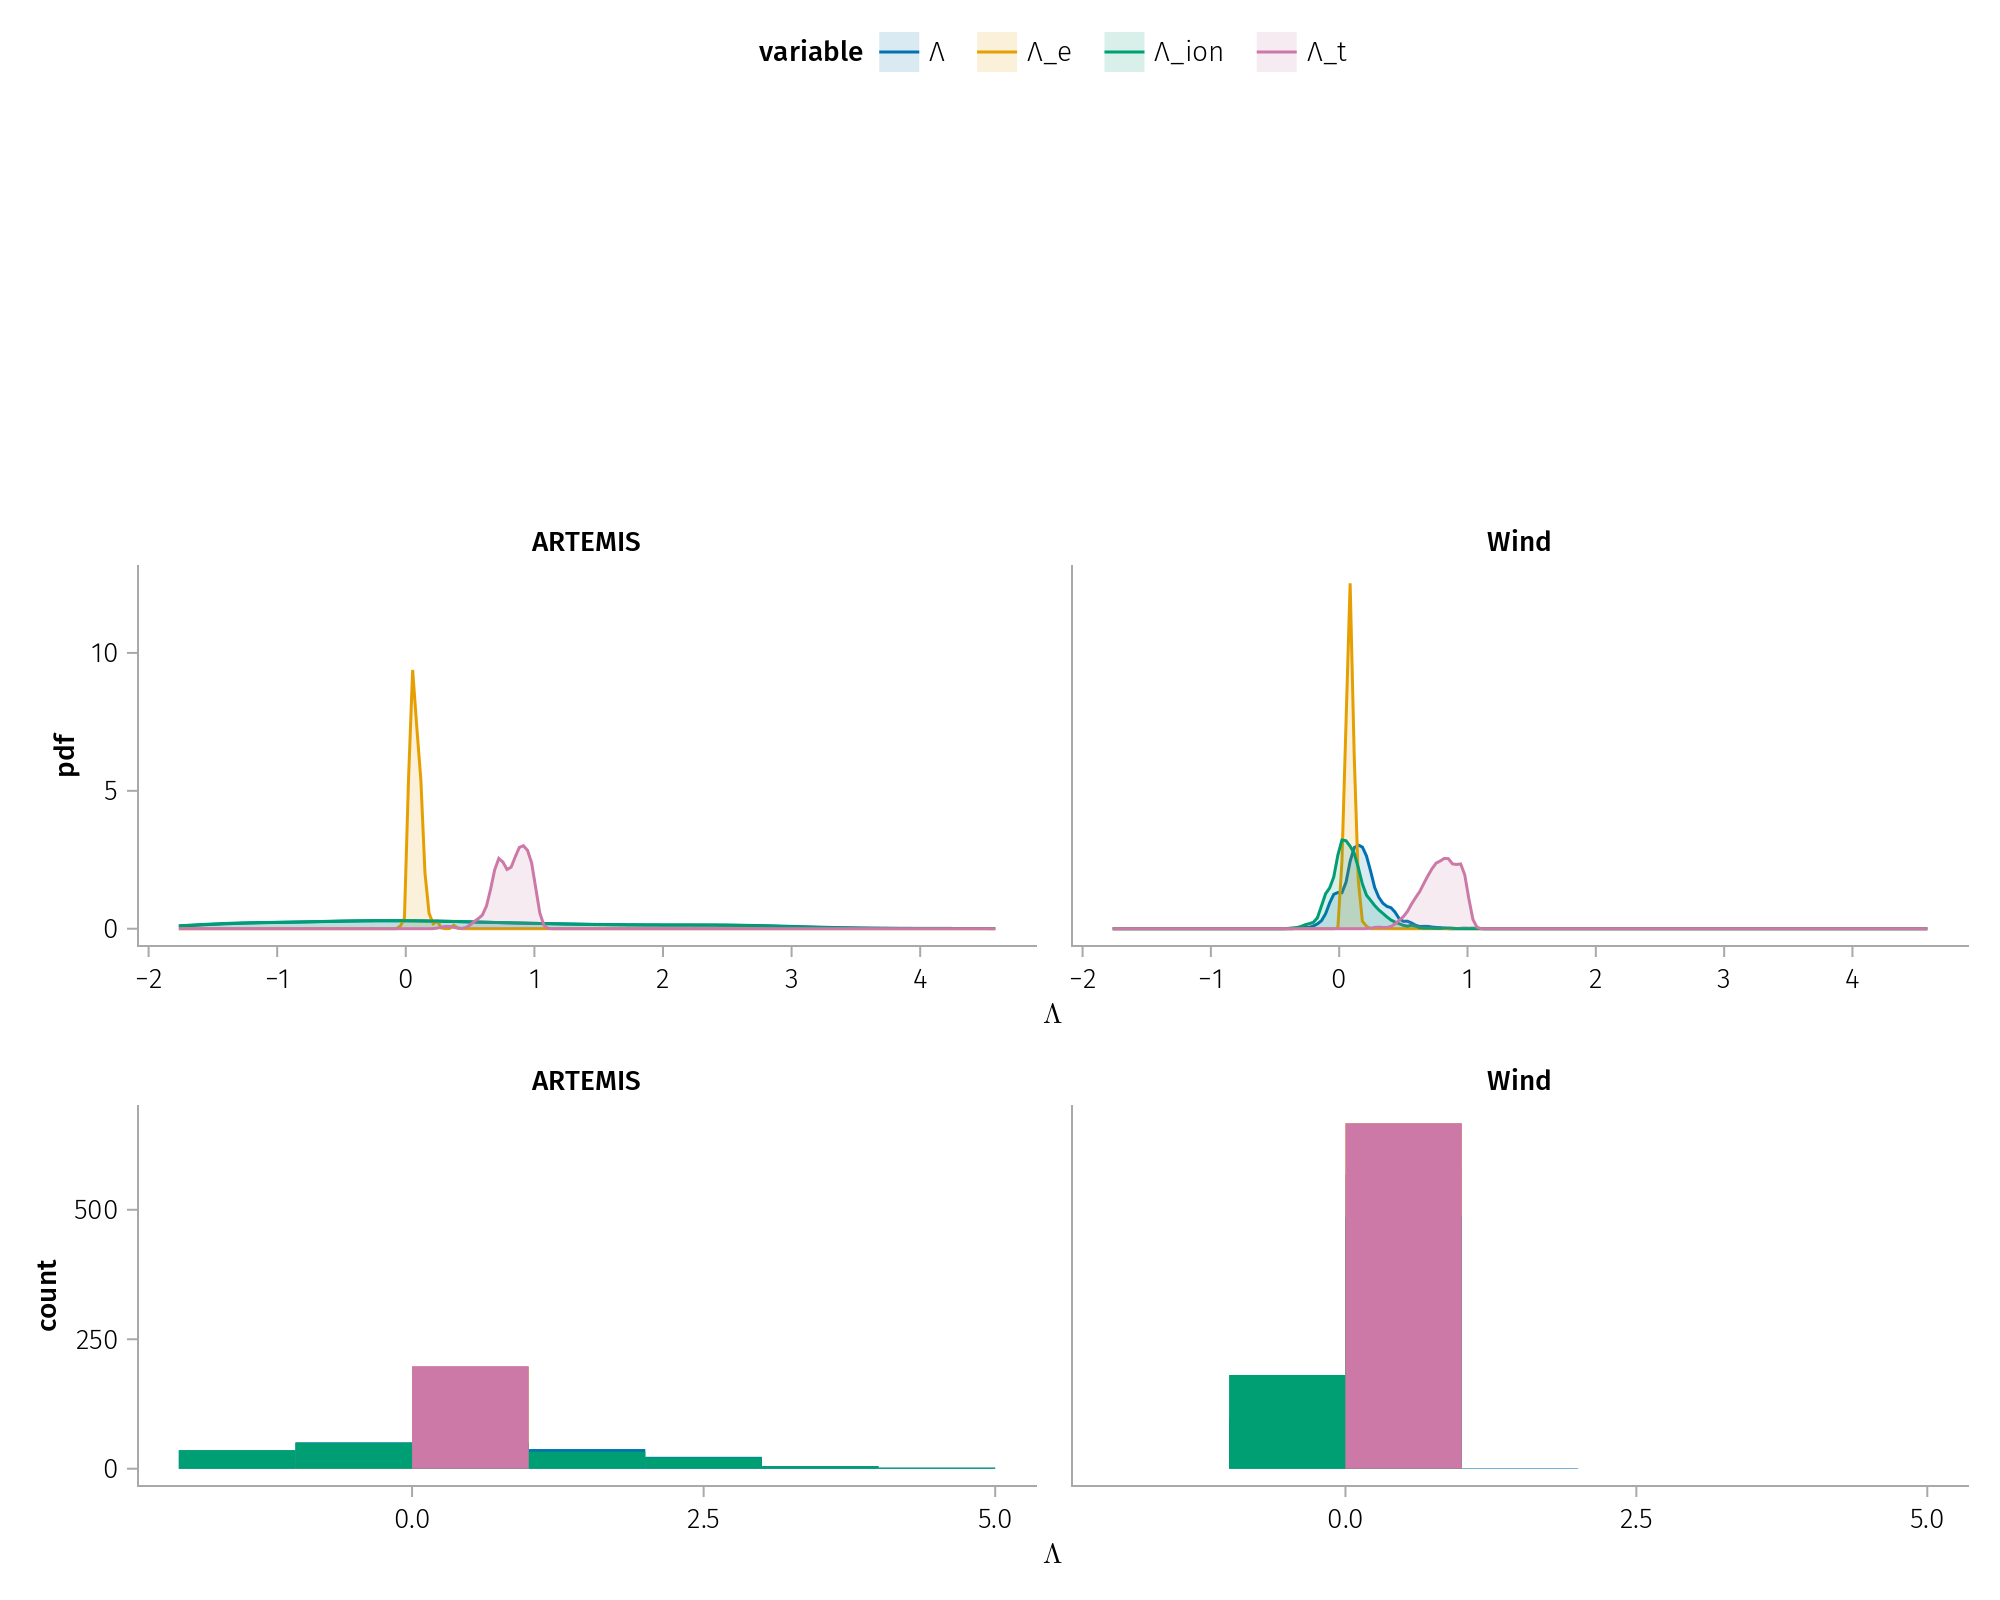

In [37]:
#| label: fig-anisotropy-comp
#| column: screen
plot_anistropy_comparison()

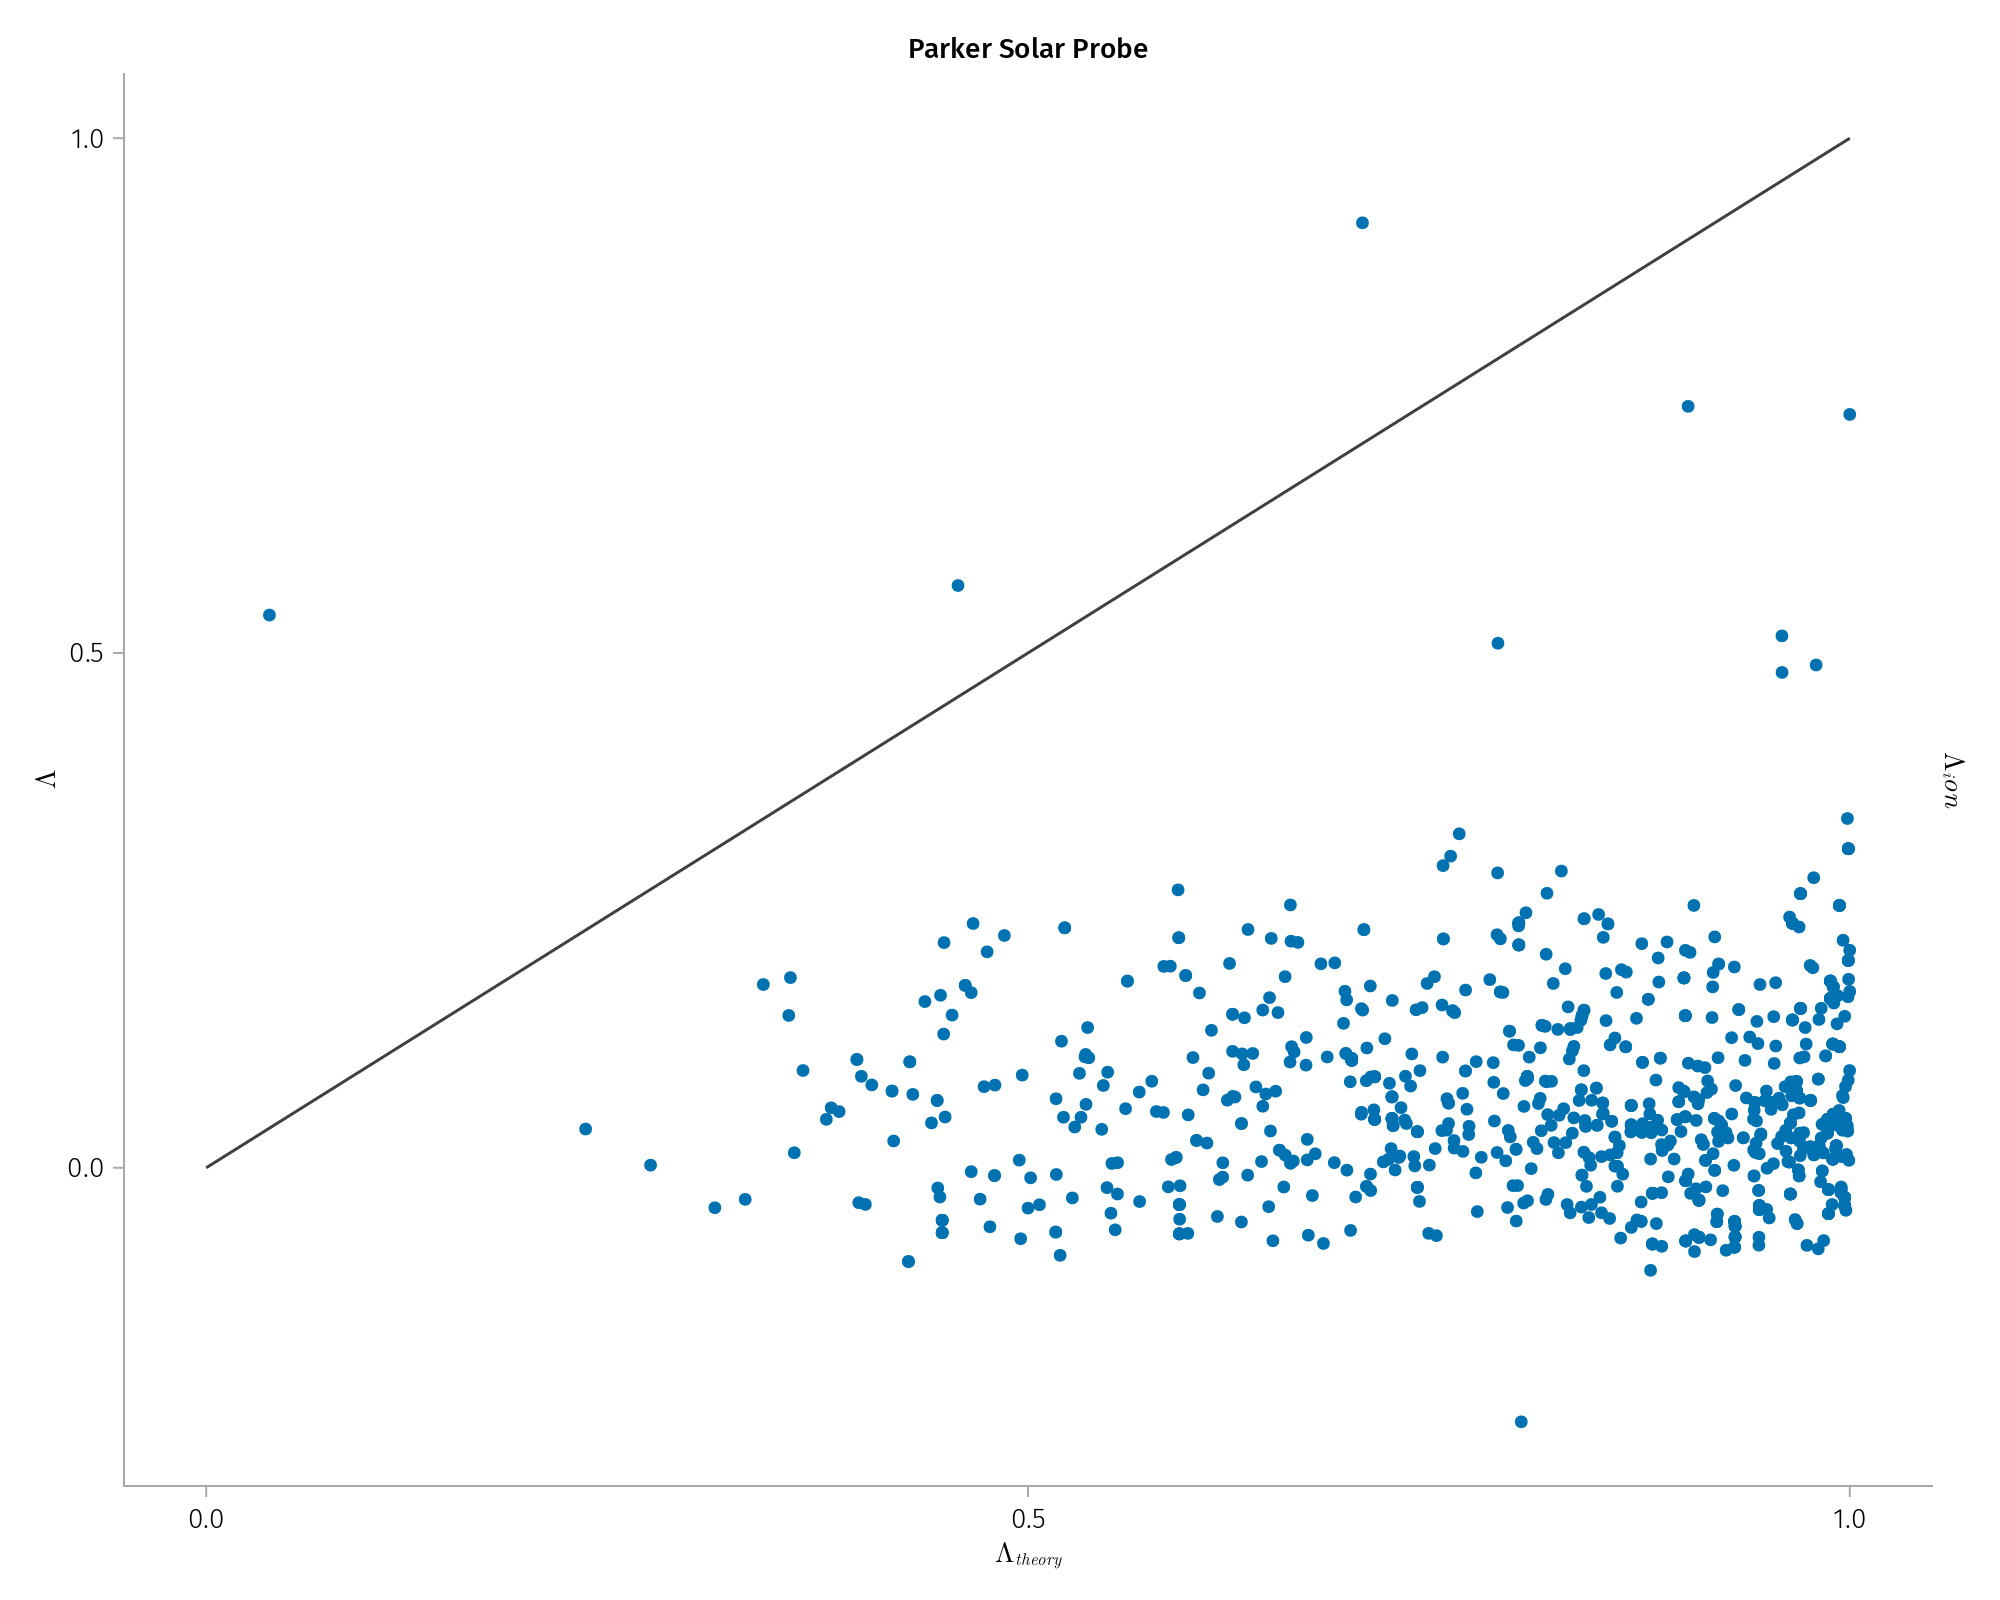

In [55]:
plot_anistropy_comparison_2d(psp_df)

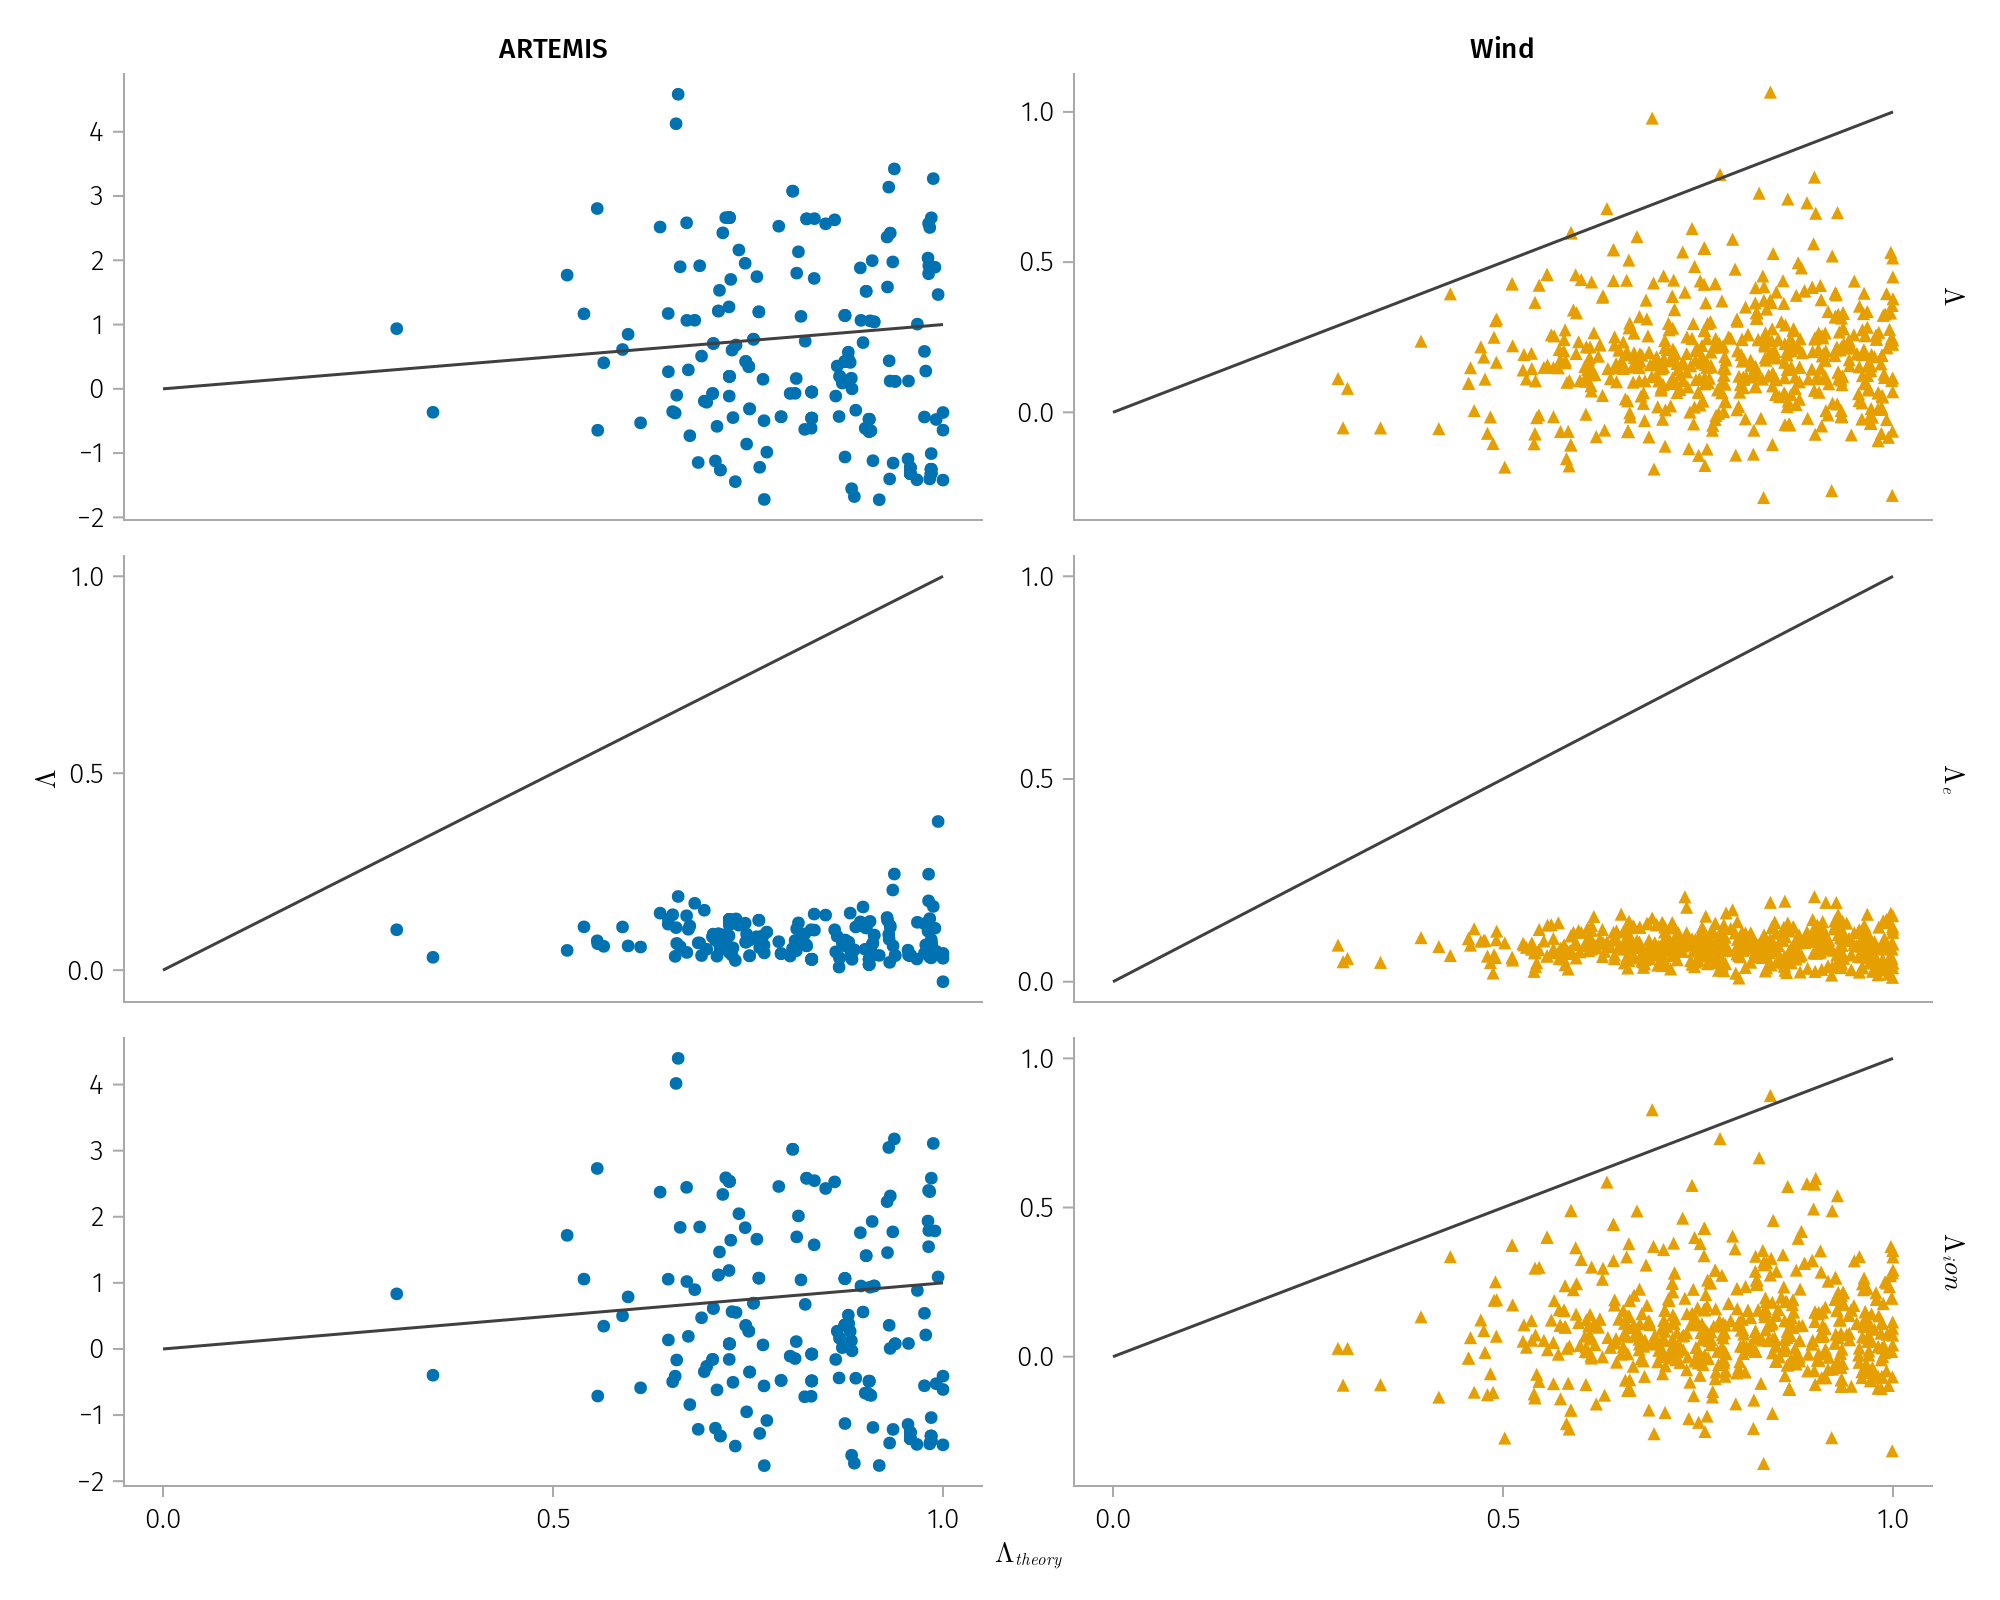

In [240]:
#| label: fig-anisotropy-comp-2d
#| column: screen
plot_anistropy_comparison_2d()

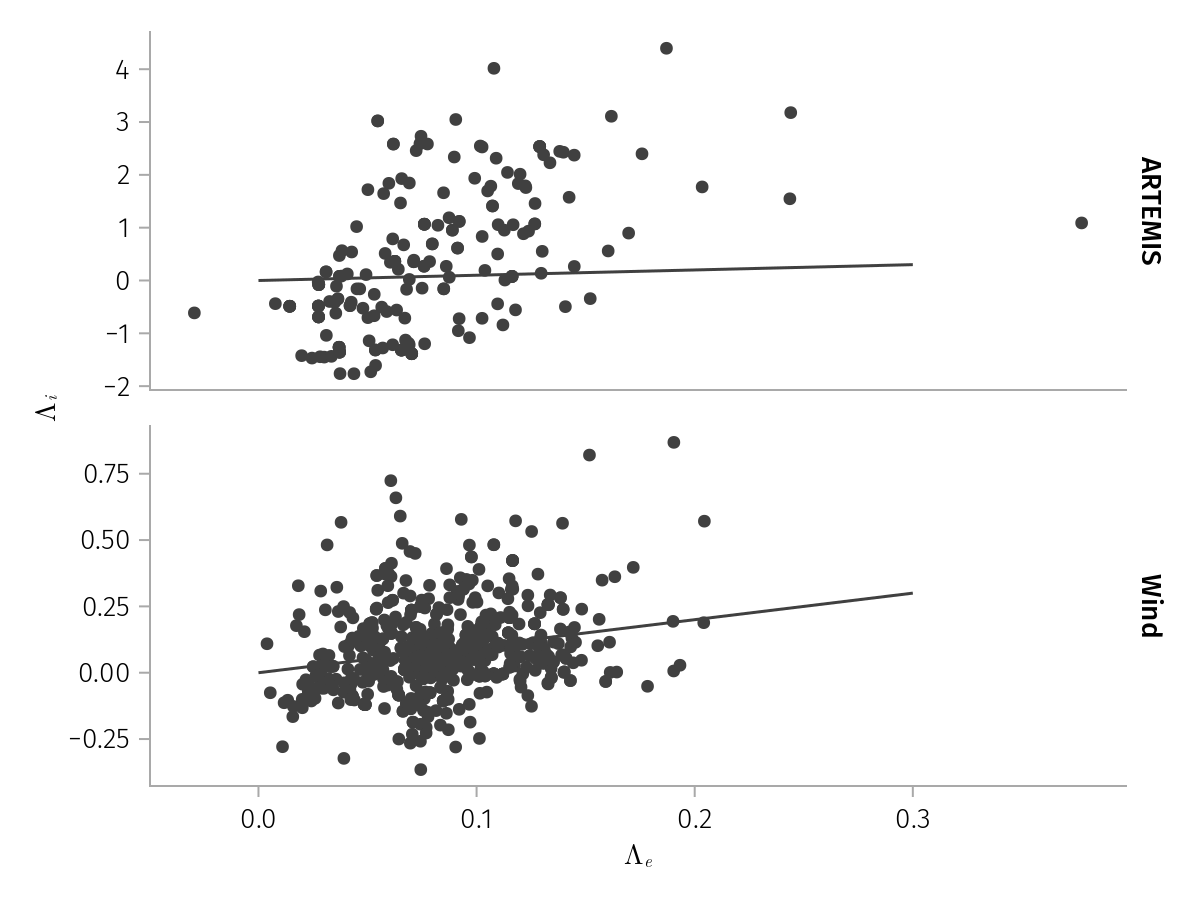

In [250]:
#| label: fig-anisotropy-comp-i-e
#| column: screen
plot_anistropy_comparison_i_e()